# Cadena de Ehrenfest
## Simulación

En este notebook simularemos el comportamiento de la cadena de Markov obtenida a partir del modelo de la caja de Ehrenfest. 

**Nico Quijada**

### Diseño de la matriz

Primero programamos la matriz que modela al proceso.

In [1]:
import numpy as np 
from numpy.linalg import matrix_power
import random
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

In [2]:
s = 50 #Definimos la cantidad de estados que irán en {0,..., s}
M = np.zeros((s+1,s+1)) #Creamos una matriz de ceros añadiendo una entrada para el estado 0.
for i in range(0, s): #Rellenamos la matriz con las probabilidades de transición calculadas
    M[i+1,i] = (i+1)/(s) #Bajo la diagonal
    M[i, i+1] = ((s)-i)/(s) #Sobre la diagonal

#Podemos descomentar la siguiente línea para observar la forma de la matriz.
#print(M)

Ahora tenemos que dar una distribución inicial. Para hacernos una idea de esta lo que haremos será empezar con una cantidad certera de esferas. 

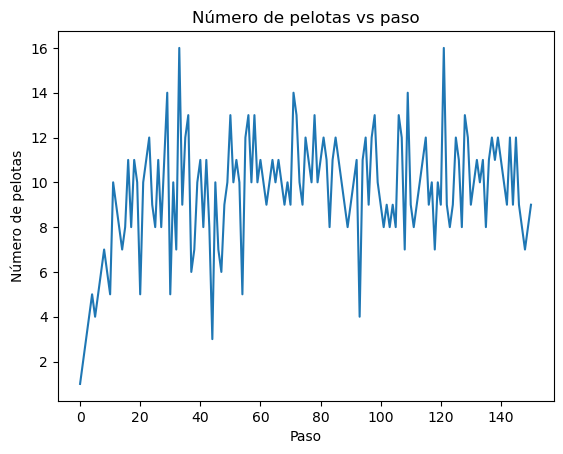

In [16]:
#Damos nuestra distribución inicial
d = np.zeros((1, s+1))
d[0,1] = 1 #Iniciamos con exactamente 1 pelotitas en la caja 1

ds = [d]

#Realizamos el experimento
def stepeh(dist):
    d = dist@M #Matriz transicionada
    pt = np.cumsum(d) #Particionamos el intervalo con base en las probabilidades de ocurrencia de cada estado
    r = np.random.uniform(0,1) #Elegimos un número aleatorio de manera uniforme entre 0 y 1
    rex = r<pt #Resultado del experimento
    indice = list(rex).index(True) #Obtenemos el índice de la primera ocurrencia del estado obtenido
    return d, indice

#Realización
ruta = [1]

for n in range(0,150):
    real = stepeh(ds[-1][0])
    ds.append(real)
    ruta = ruta +  [real[1]]
    
#Vemos cómo aumenta el número de pelotas en la caja 1
plt.plot(ruta)
plt.xlabel("Paso")
plt.ylabel("Número de pelotas")
plt.title("Número de pelotas vs paso")
plt.show()
    

Ahora preparamos una animación del proceso:

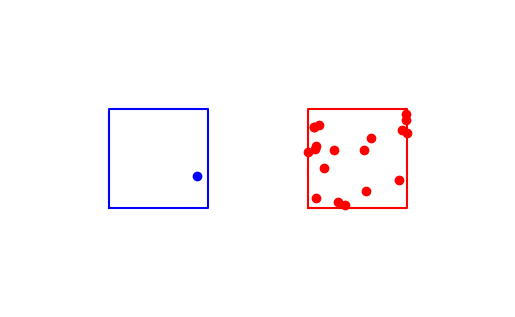

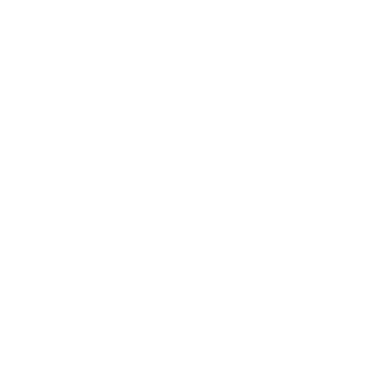

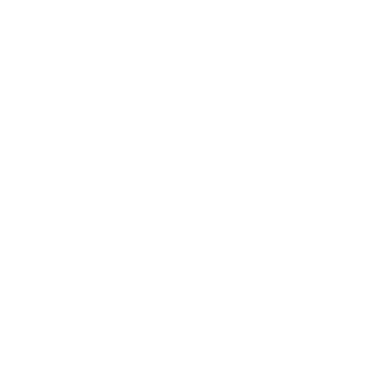

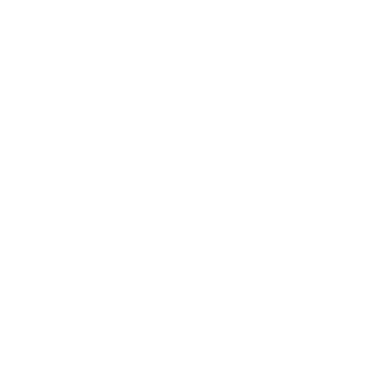

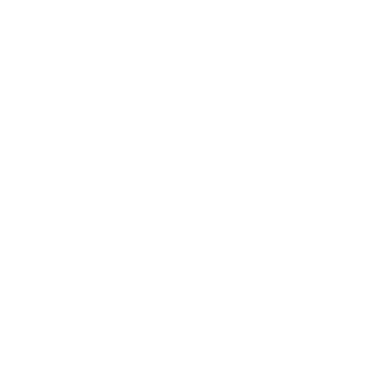

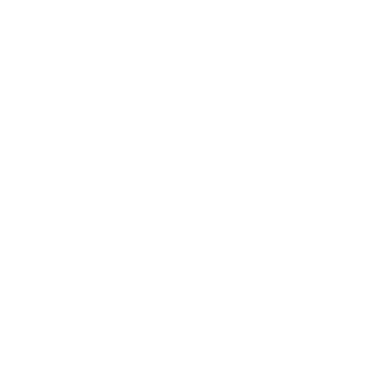

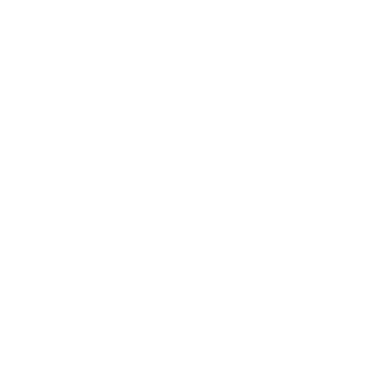

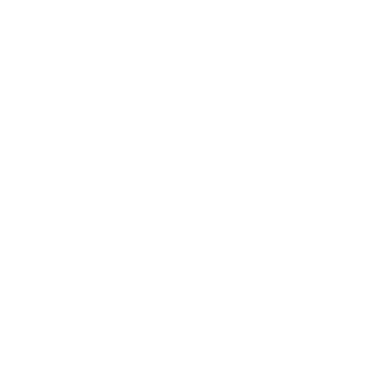

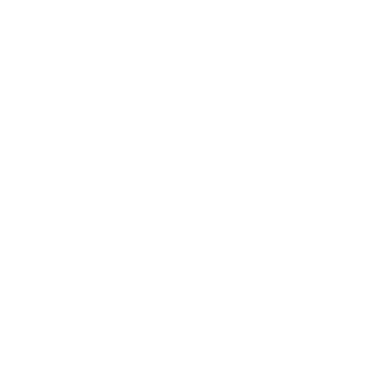

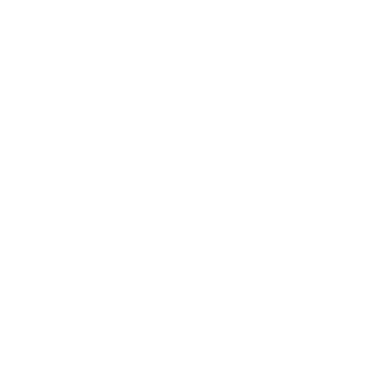

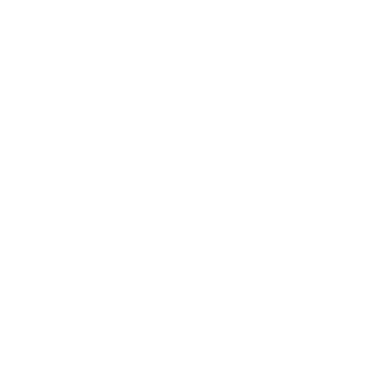

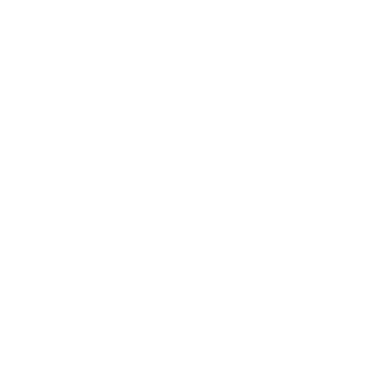

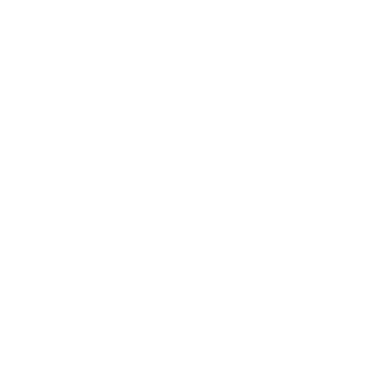

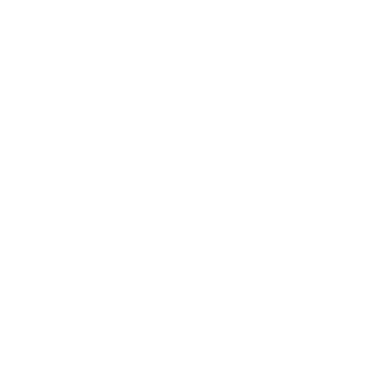

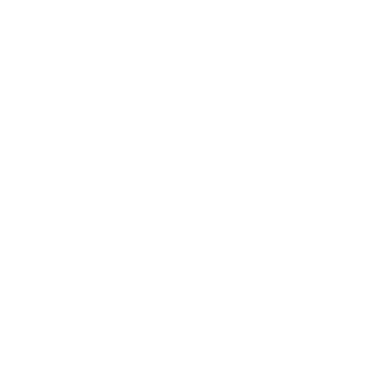

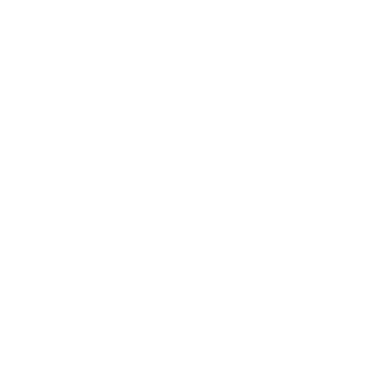

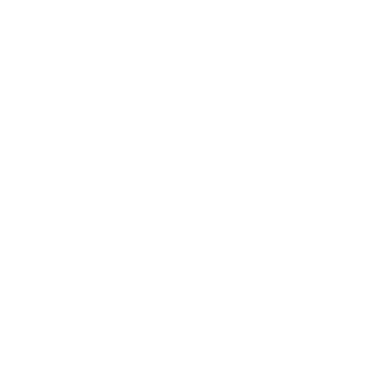

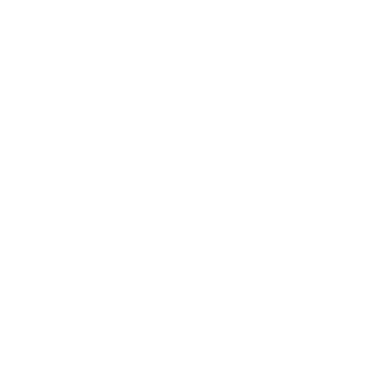

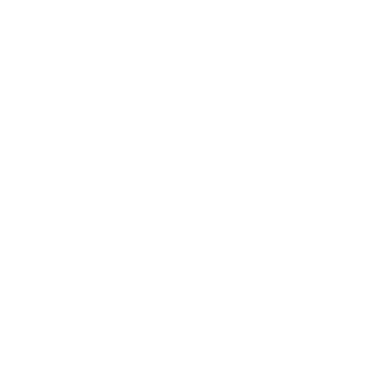

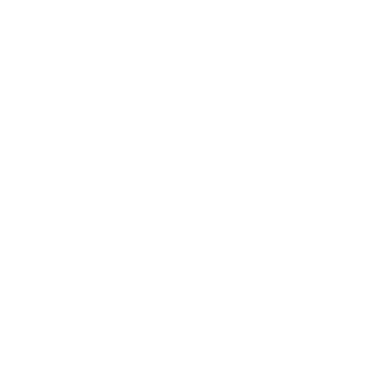

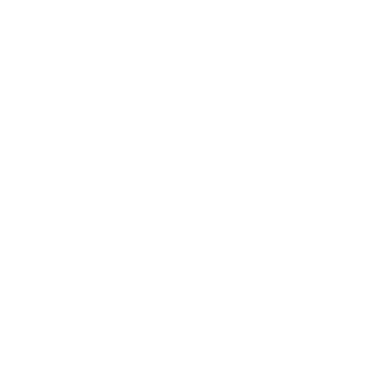

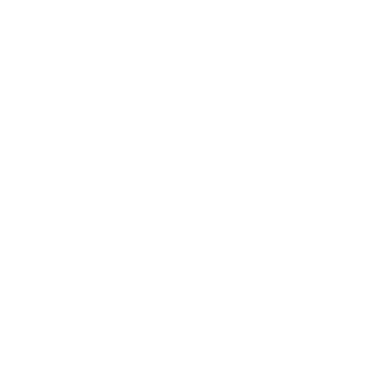

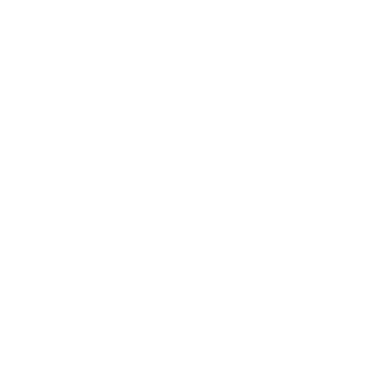

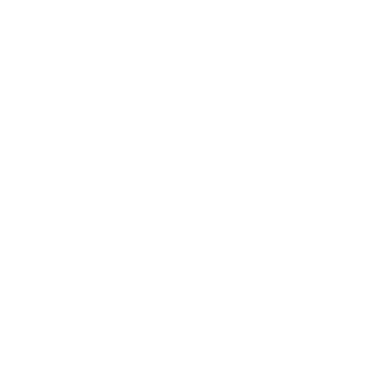

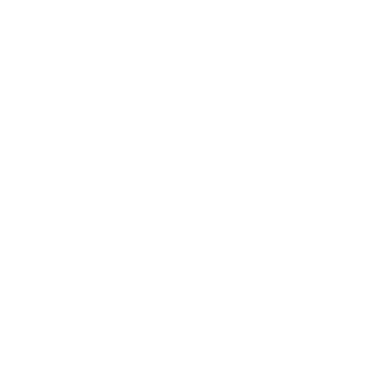

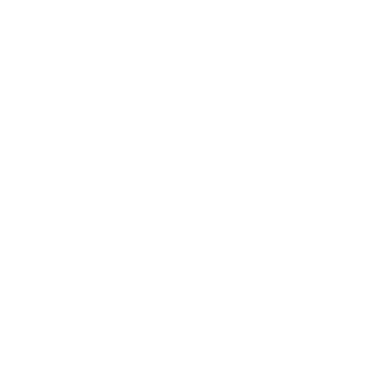

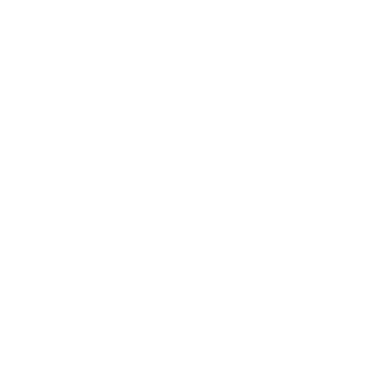

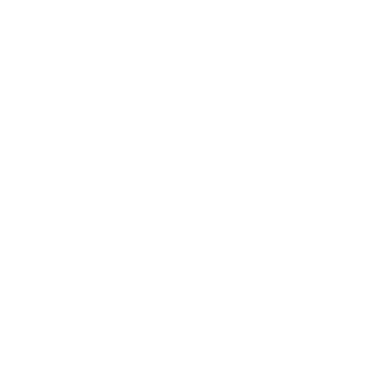

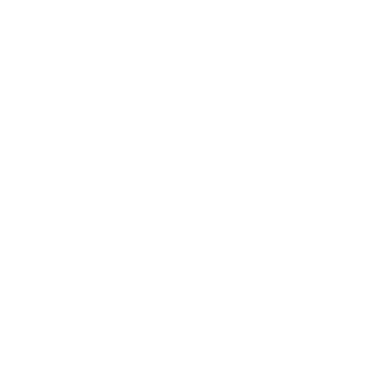

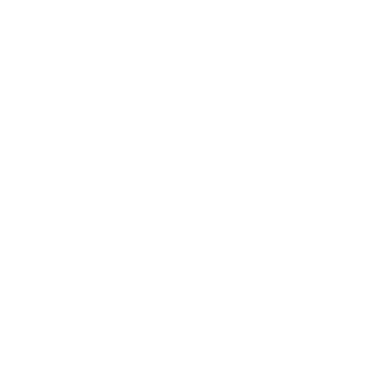

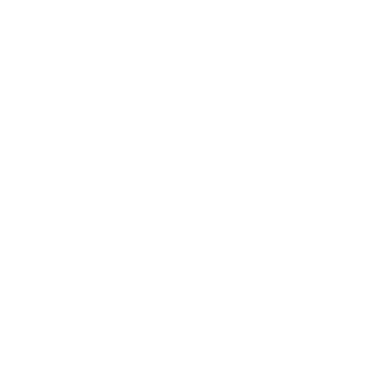

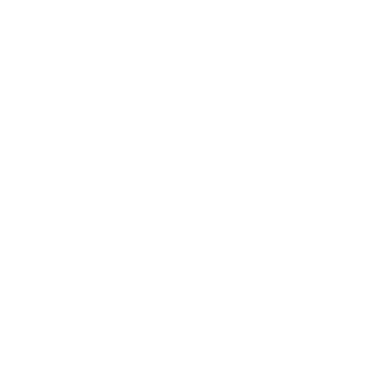

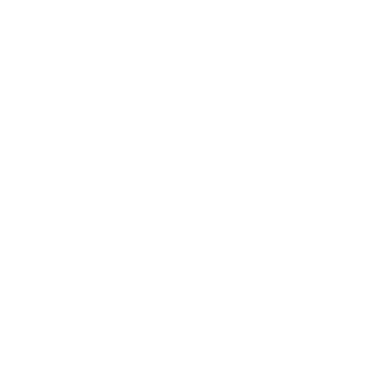

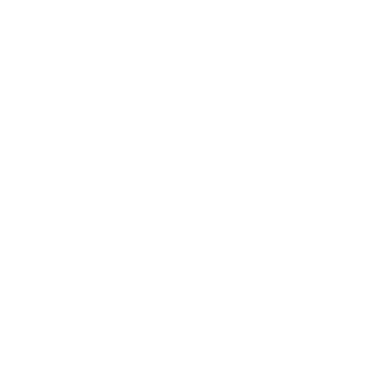

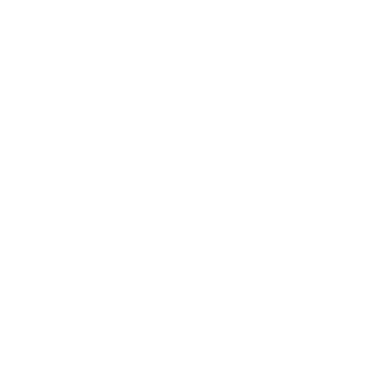

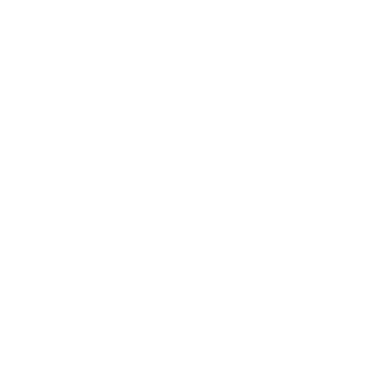

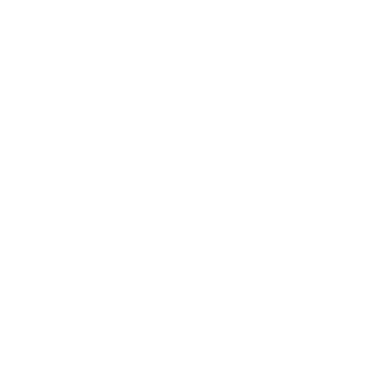

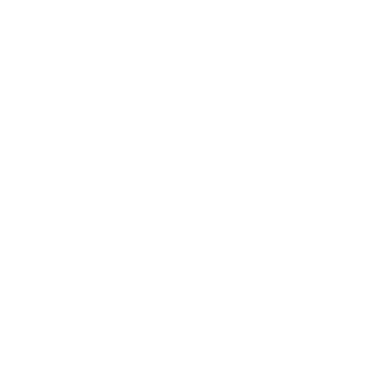

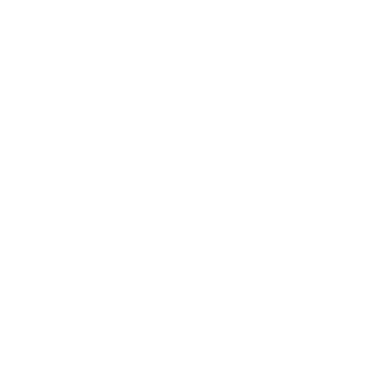

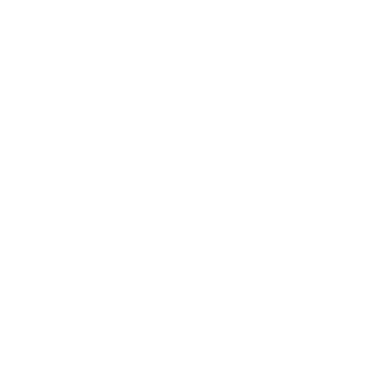

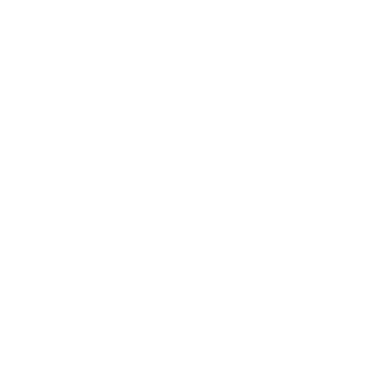

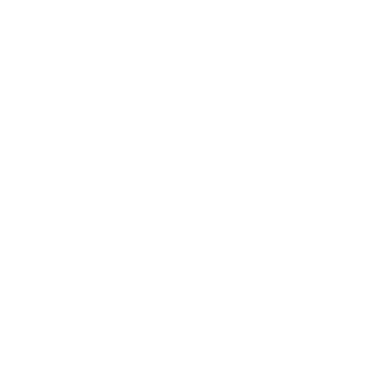

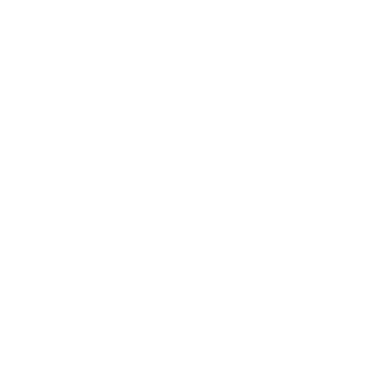

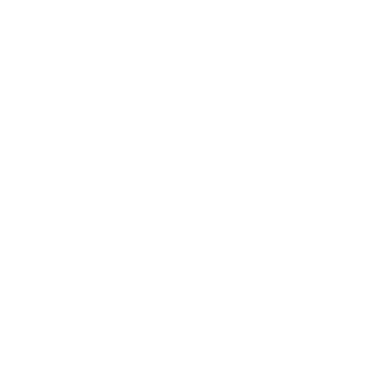

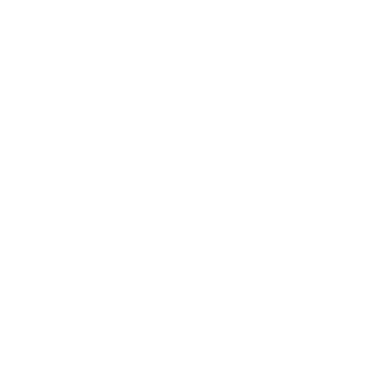

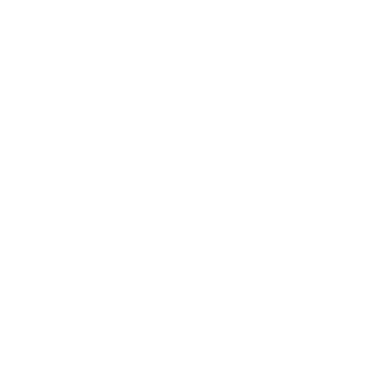

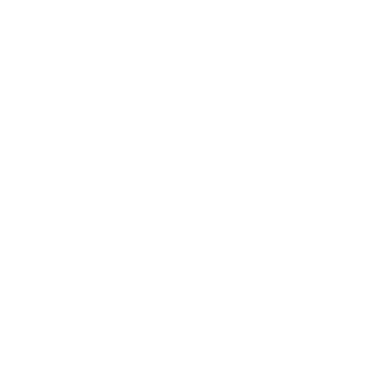

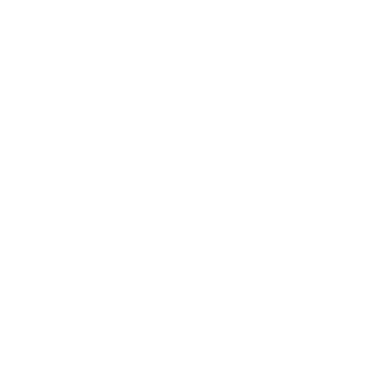

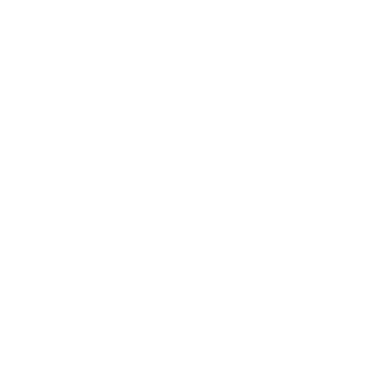

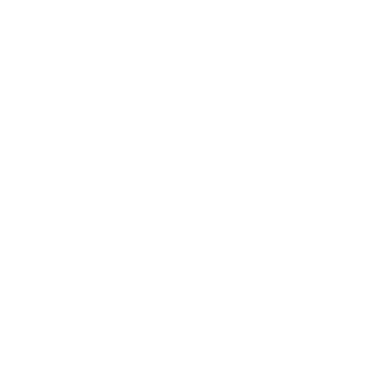

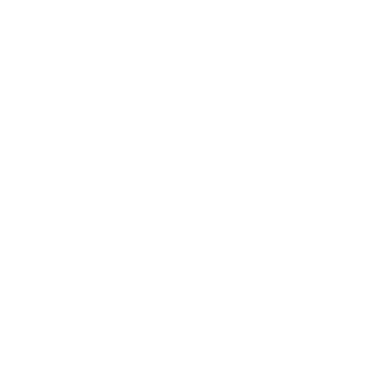

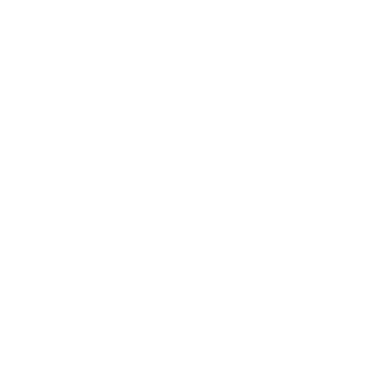

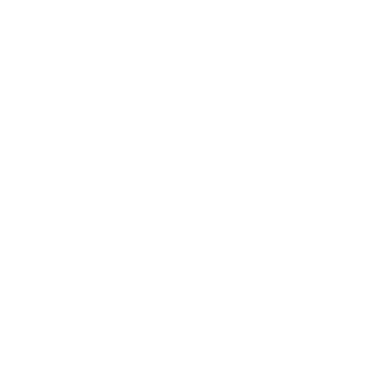

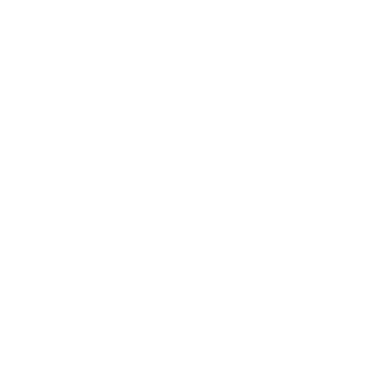

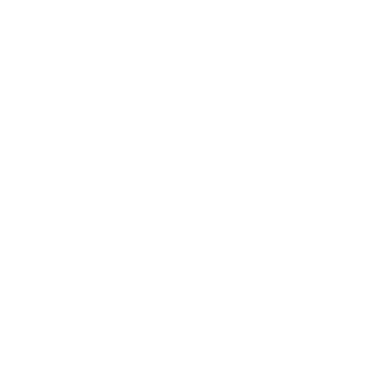

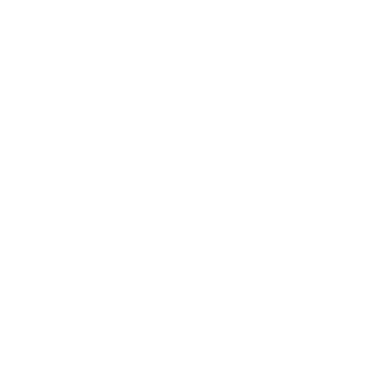

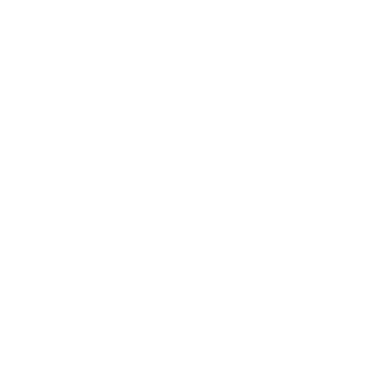

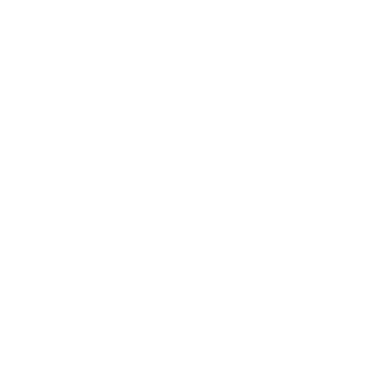

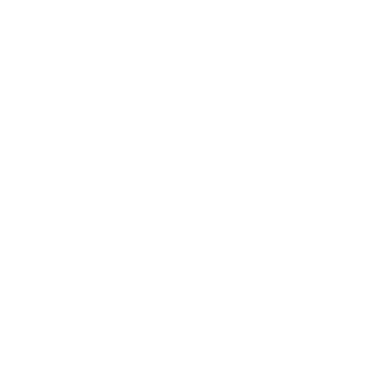

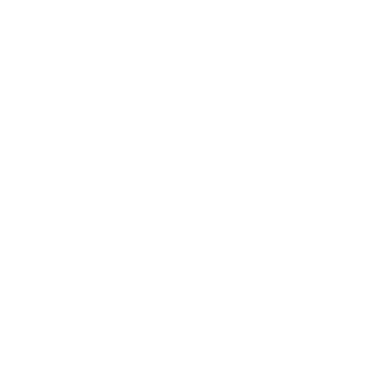

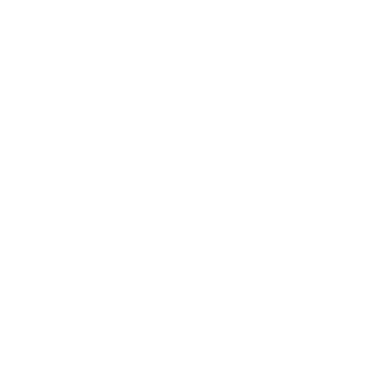

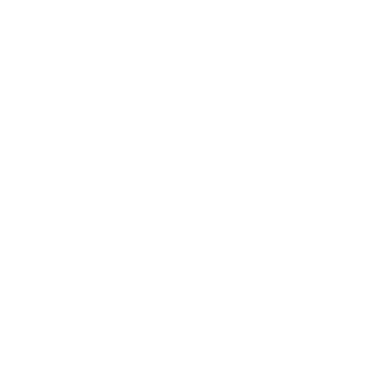

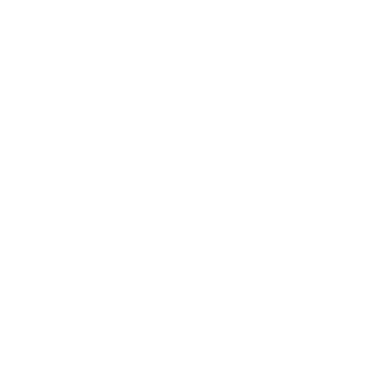

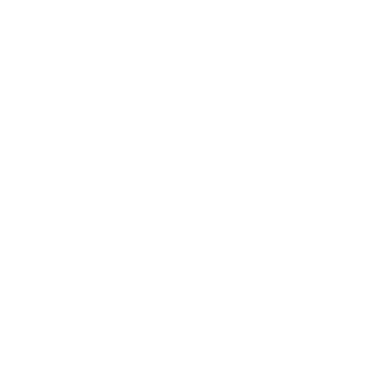

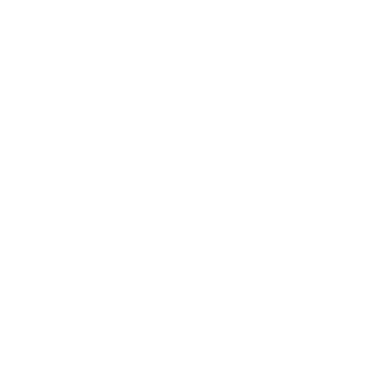

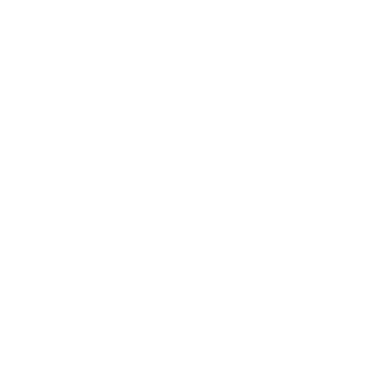

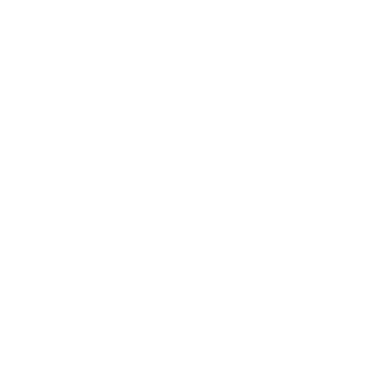

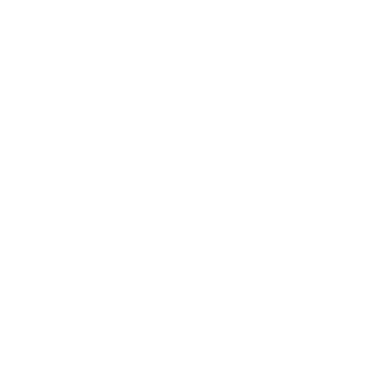

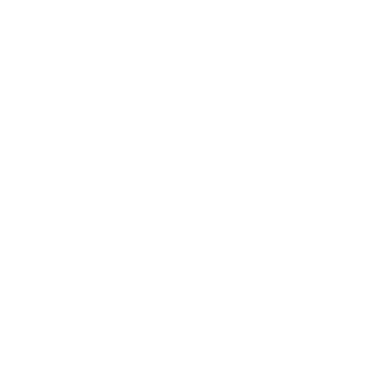

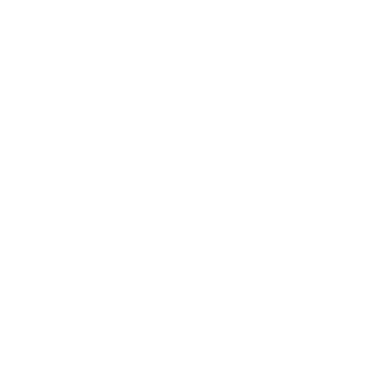

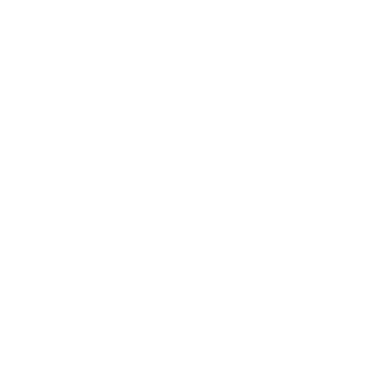

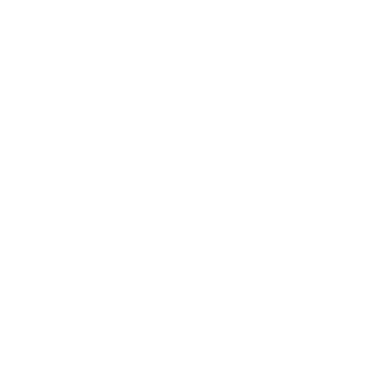

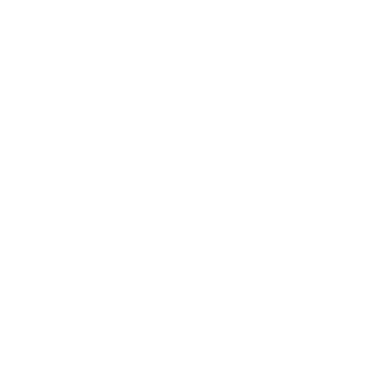

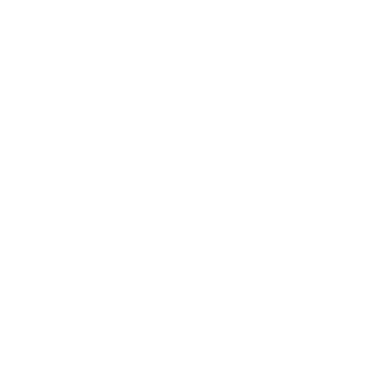

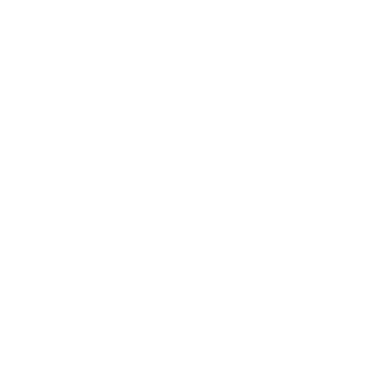

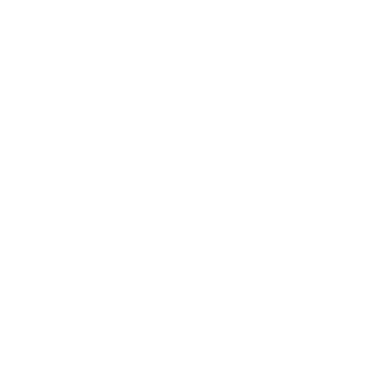

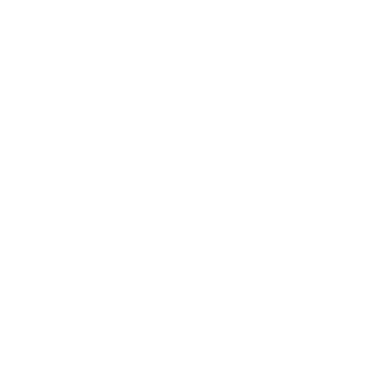

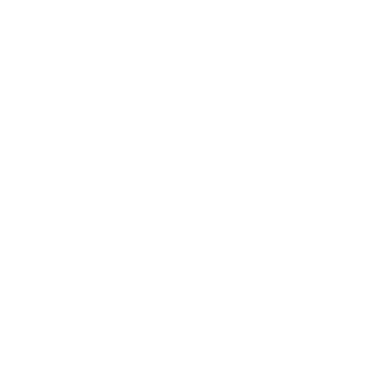

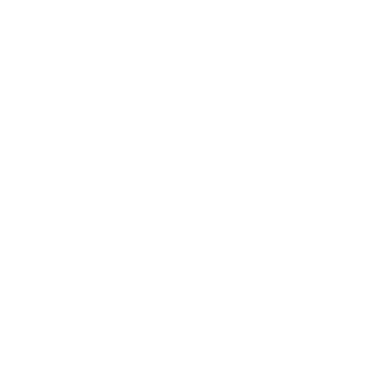

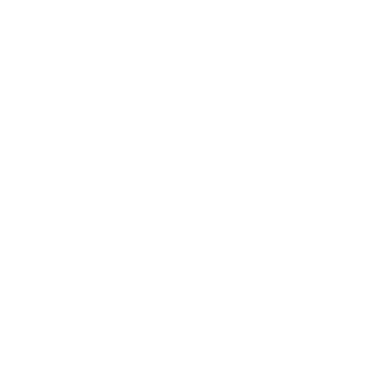

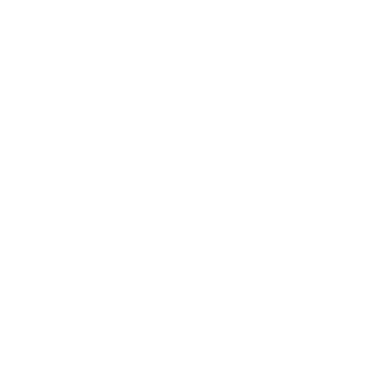

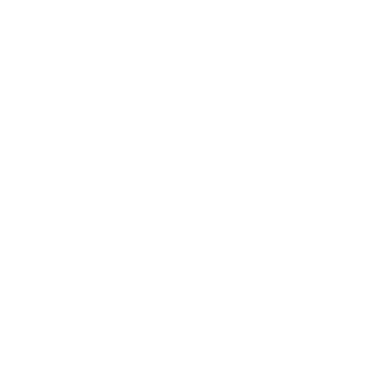

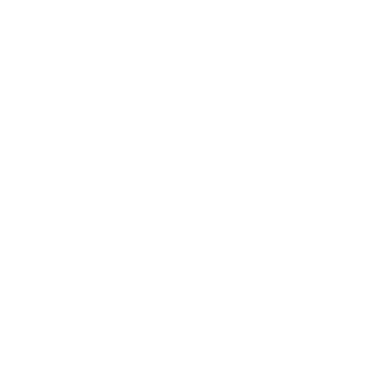

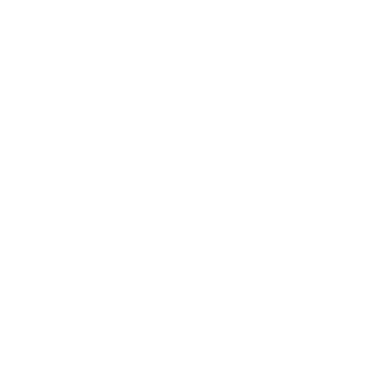

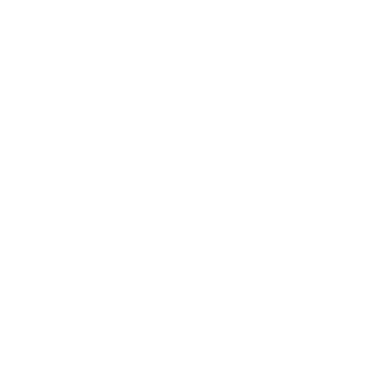

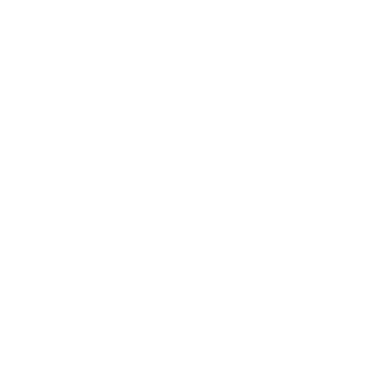

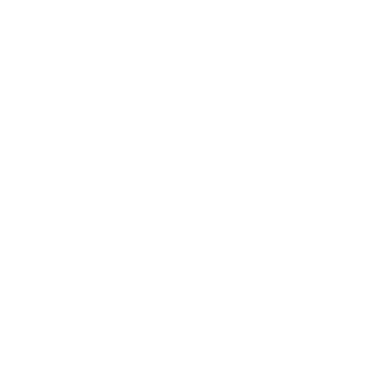

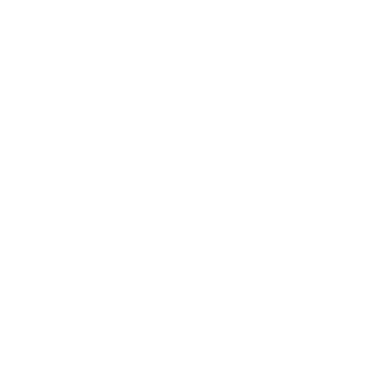

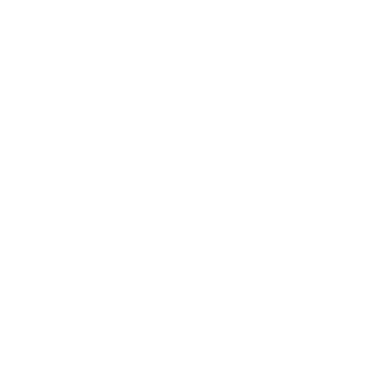

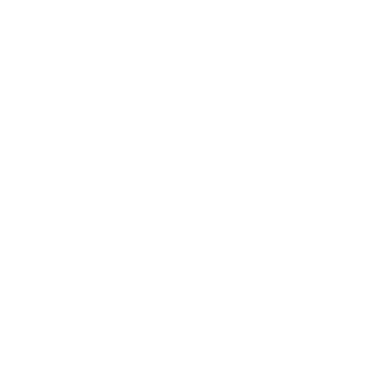

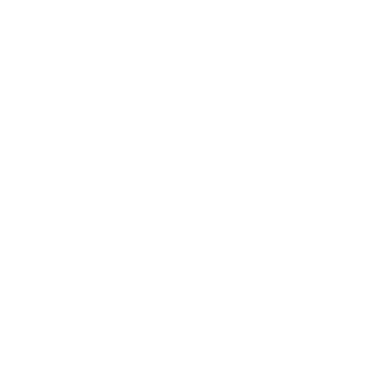

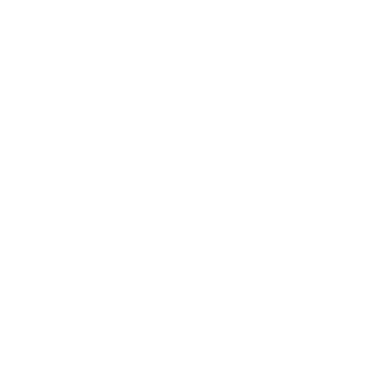

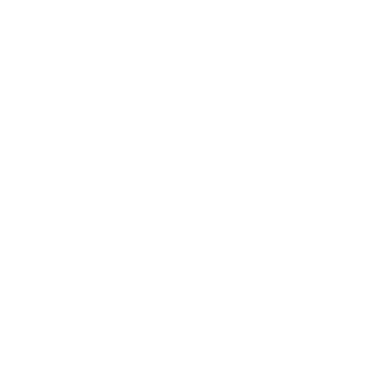

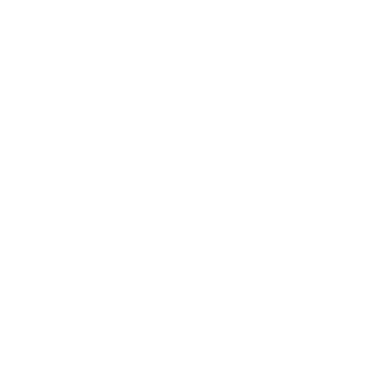

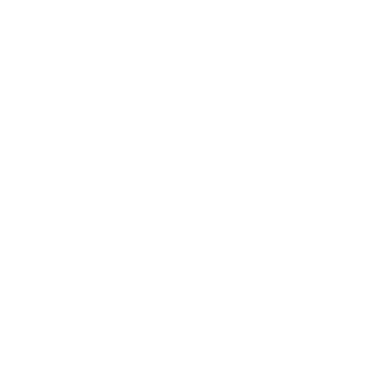

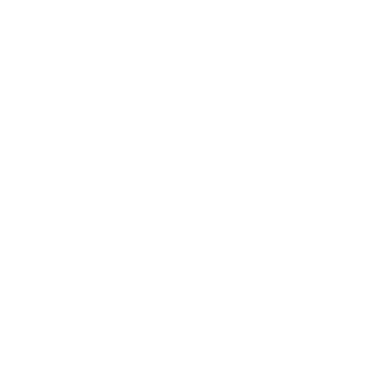

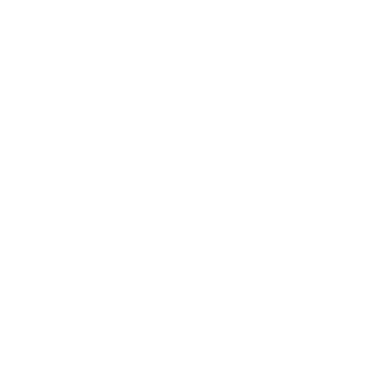

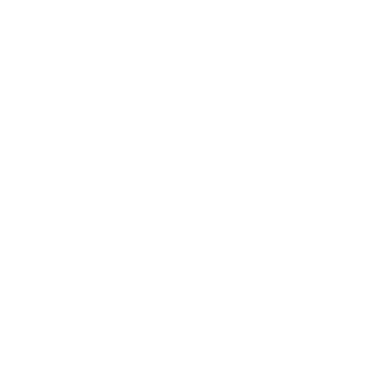

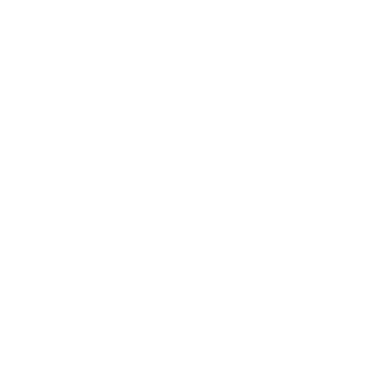

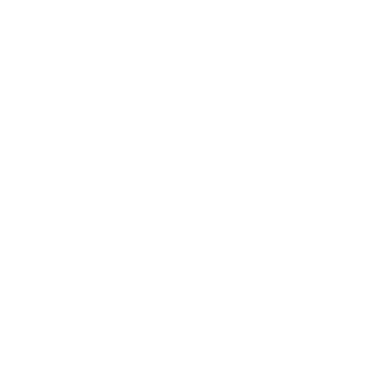

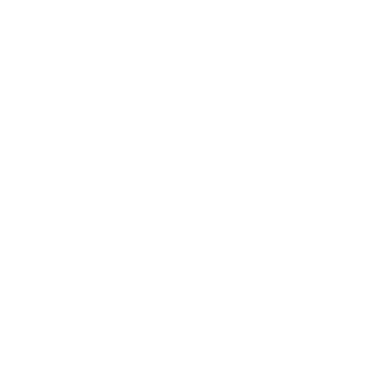

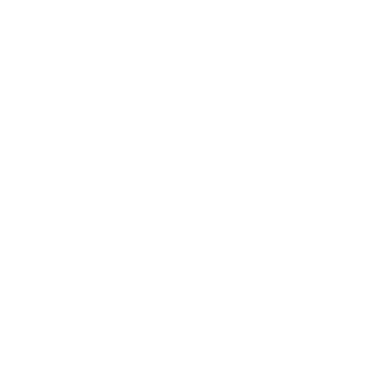

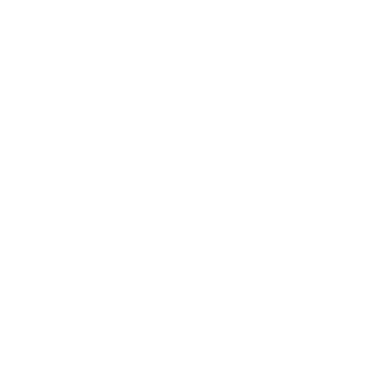

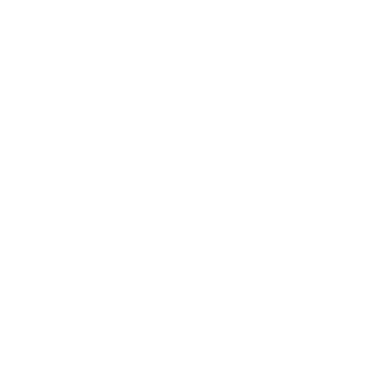

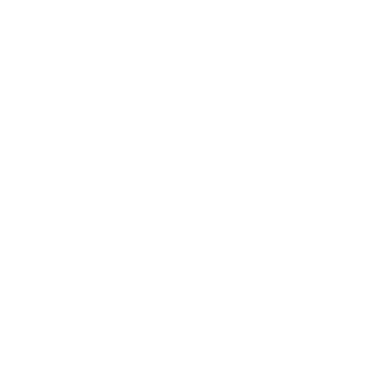

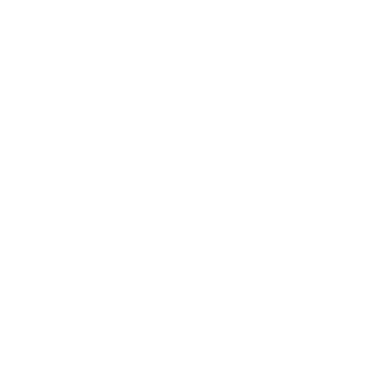

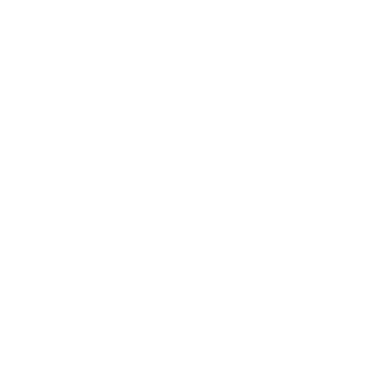

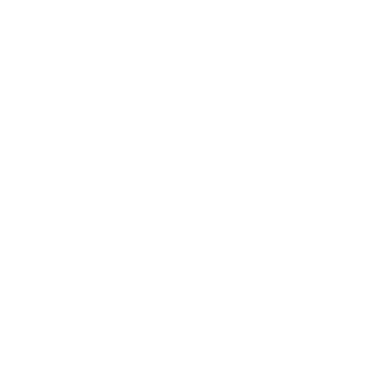

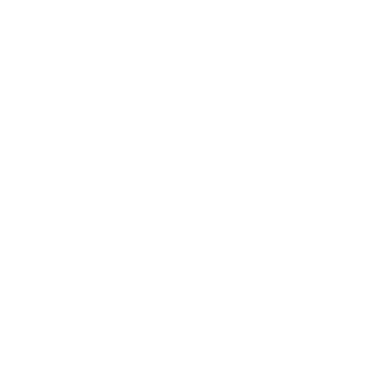

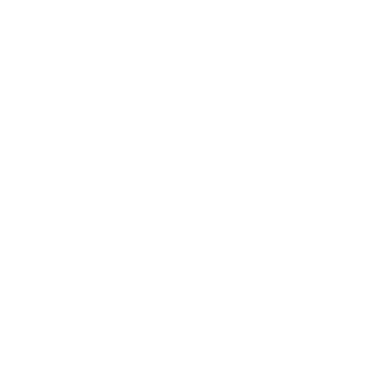

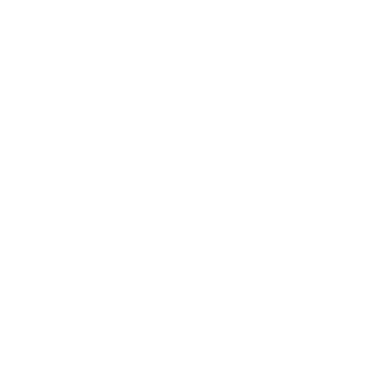

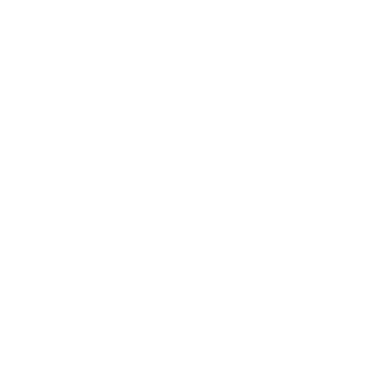

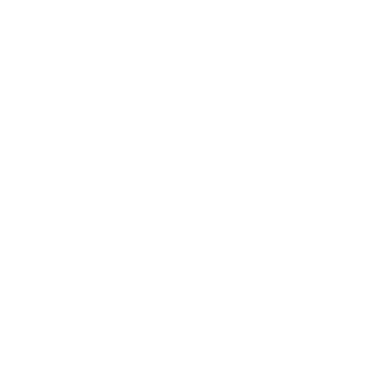

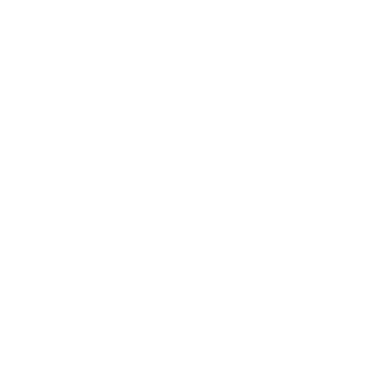

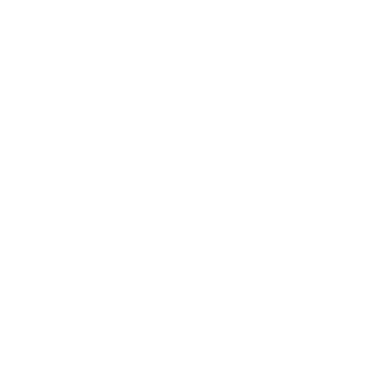

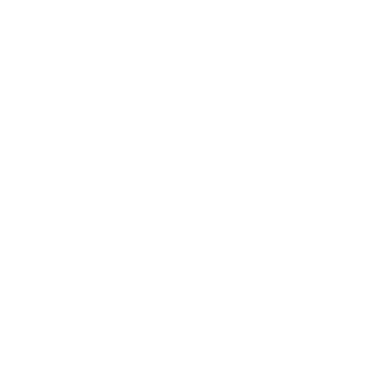

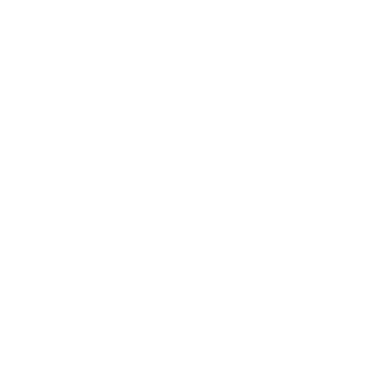

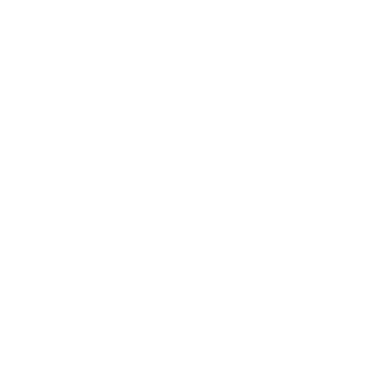

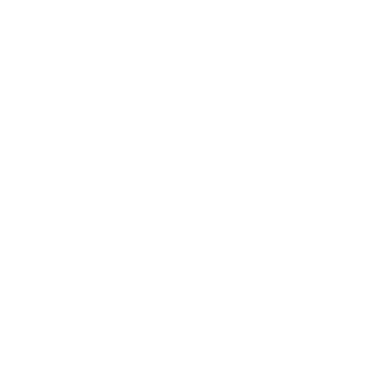

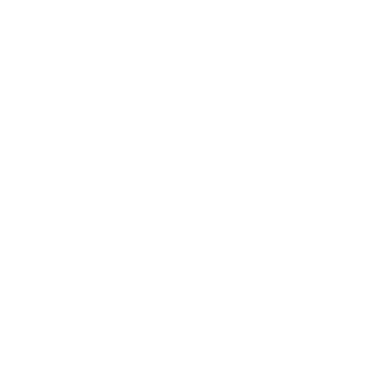

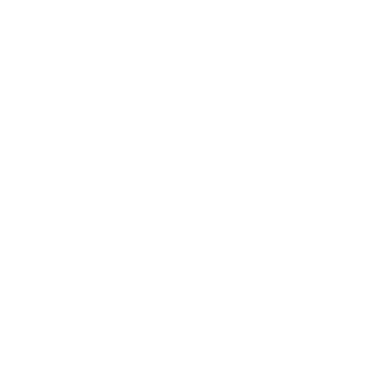

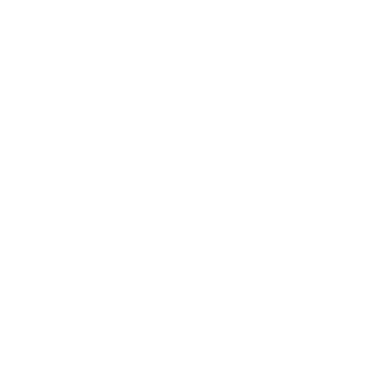

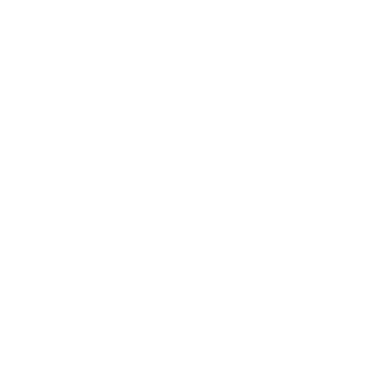

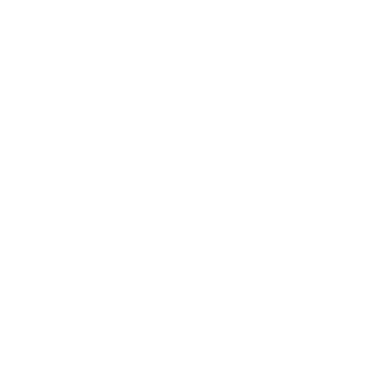

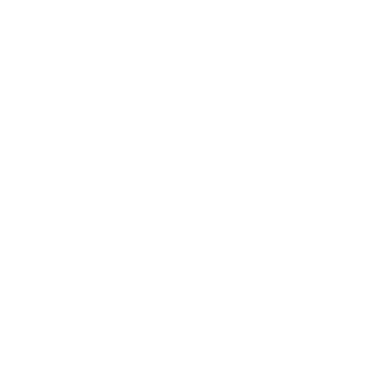

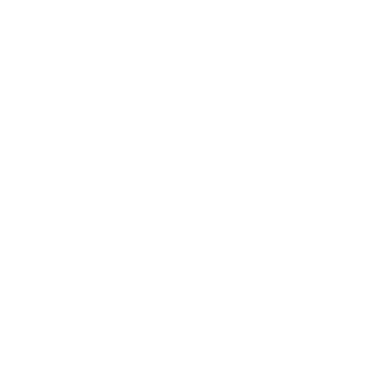

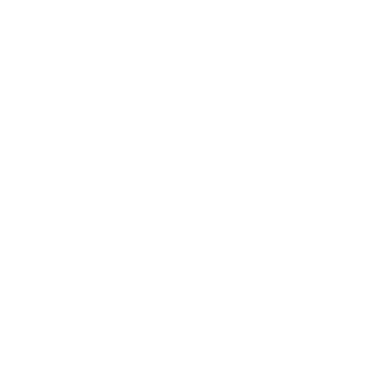

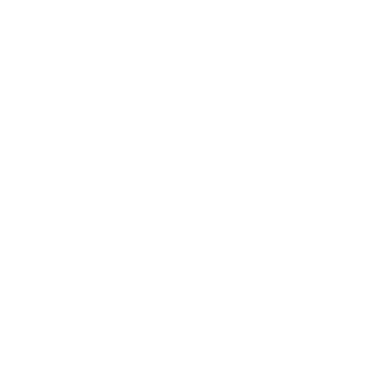

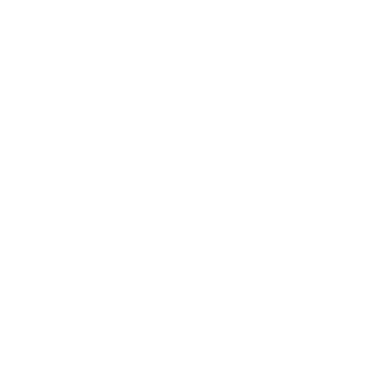

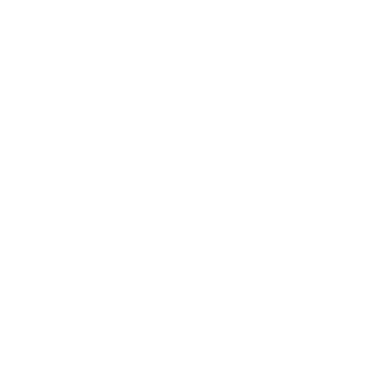

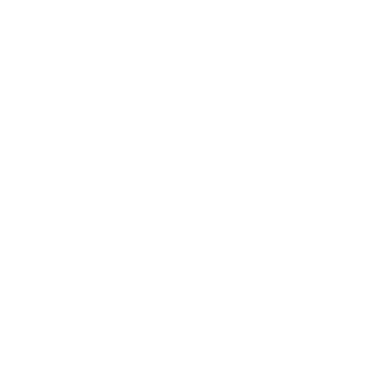

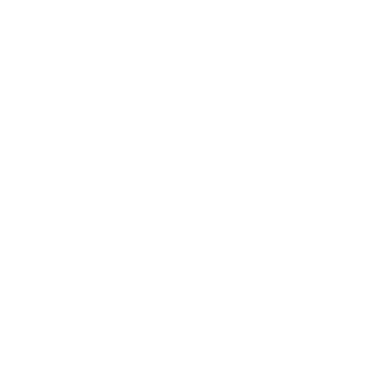

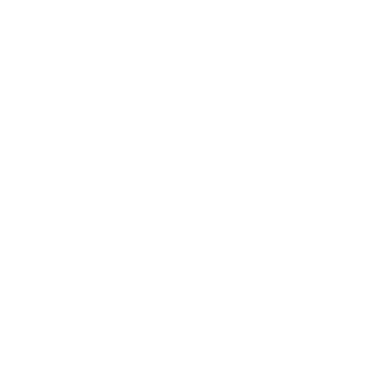

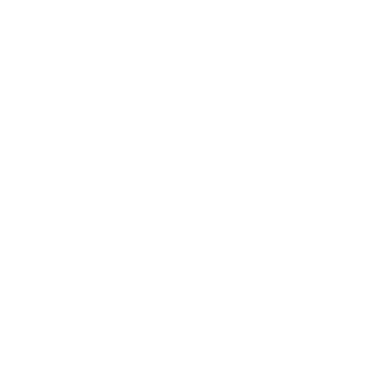

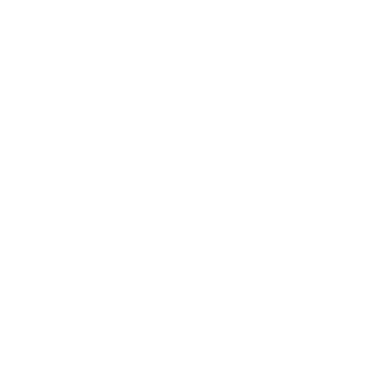

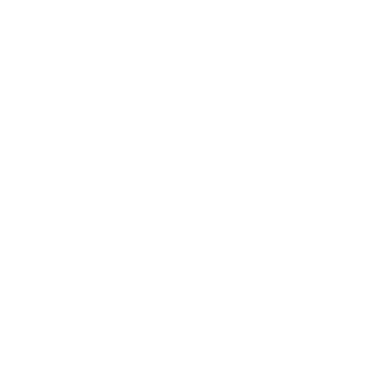

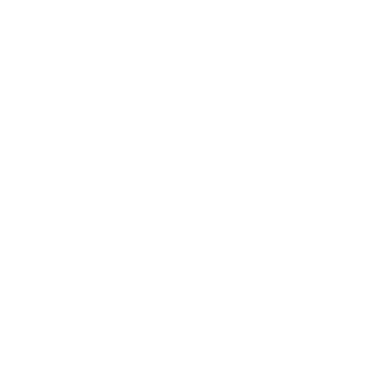

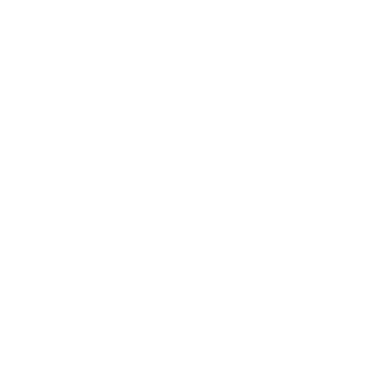

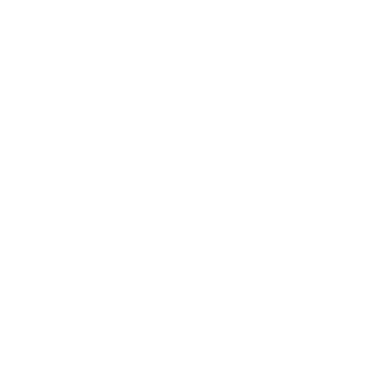

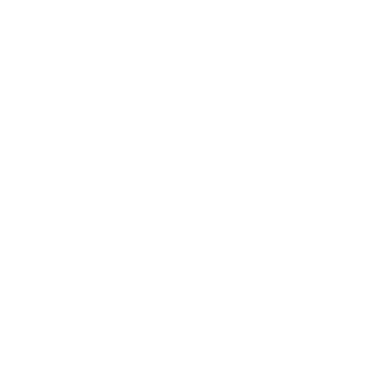

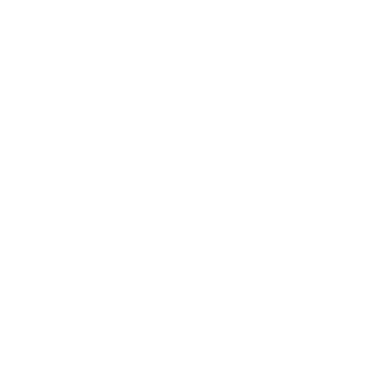

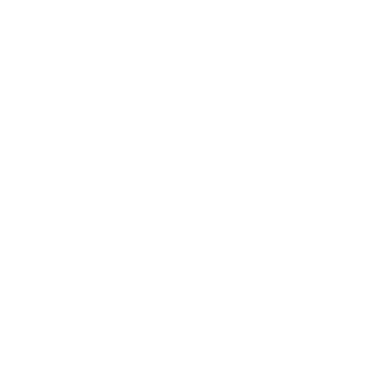

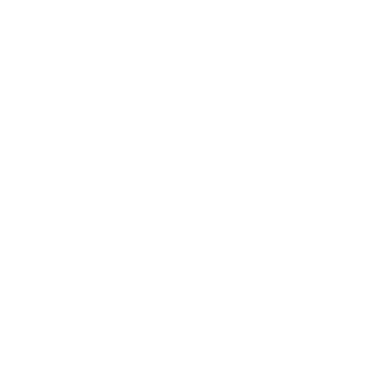

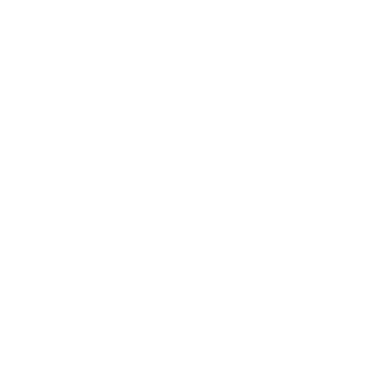

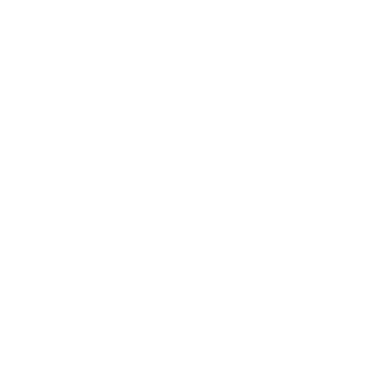

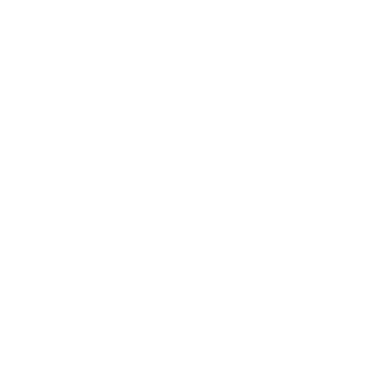

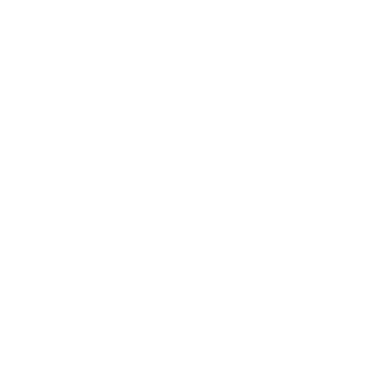

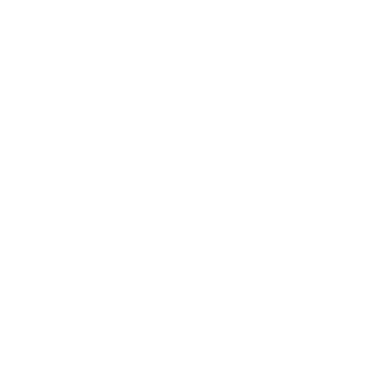

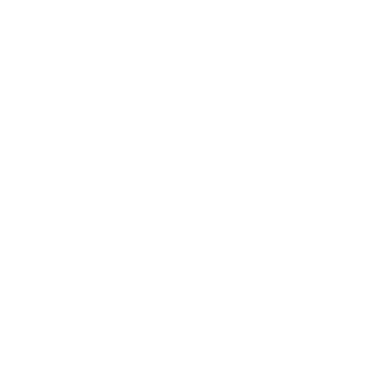

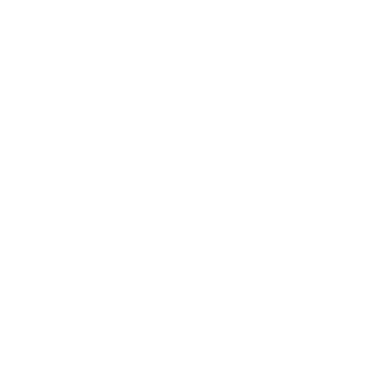

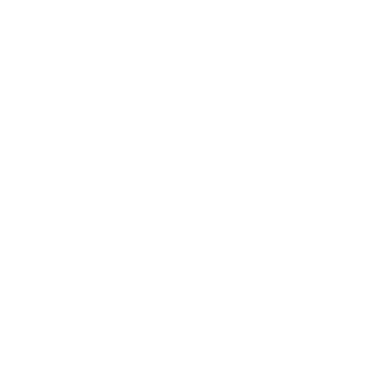

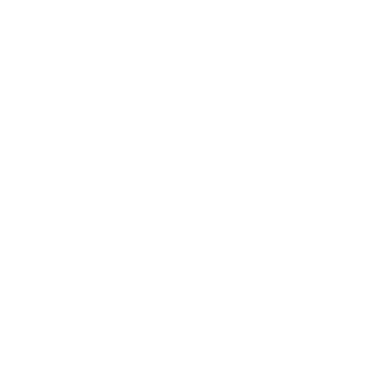

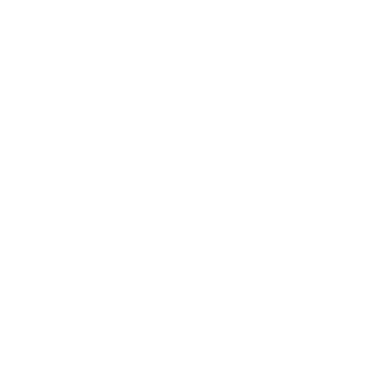

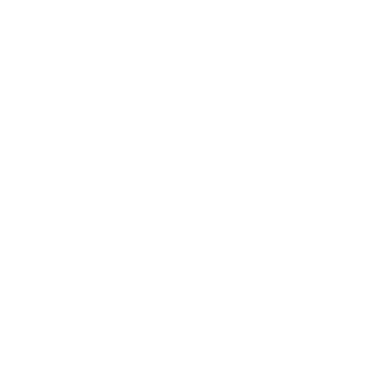

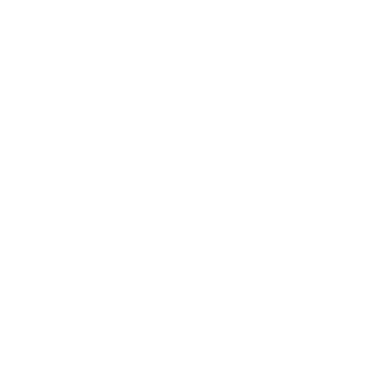

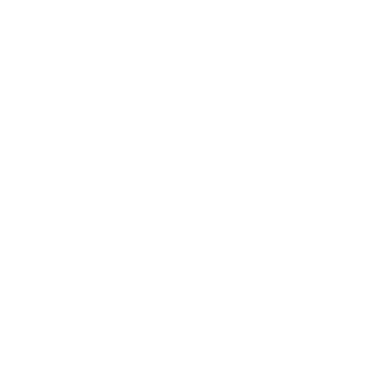

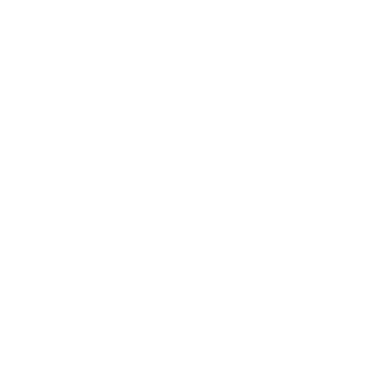

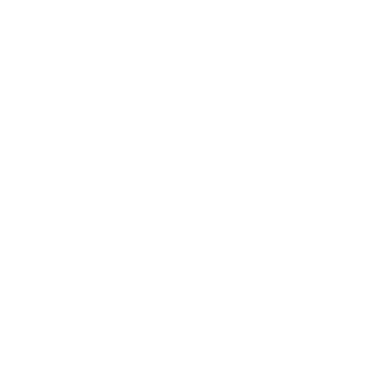

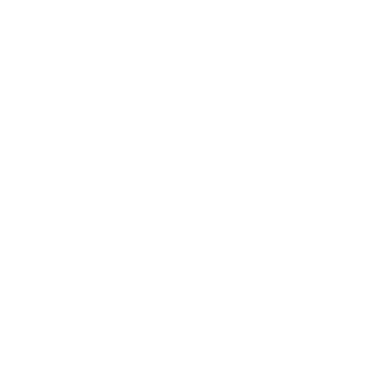

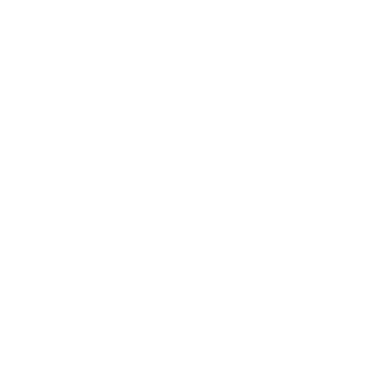

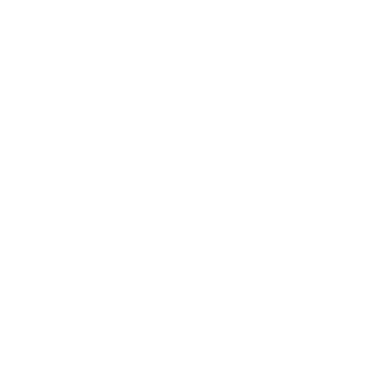

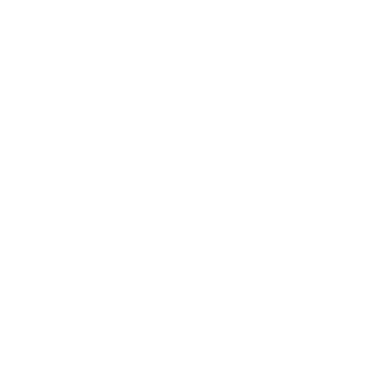

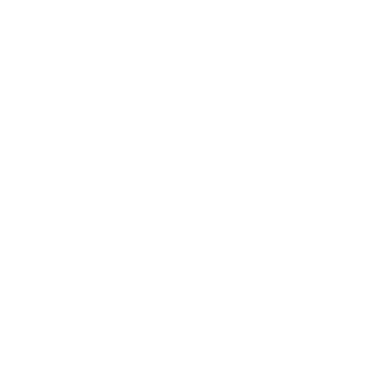

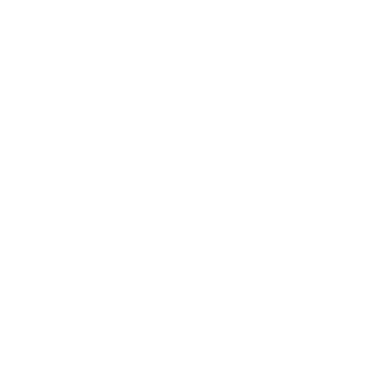

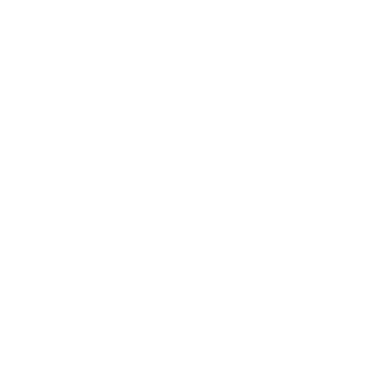

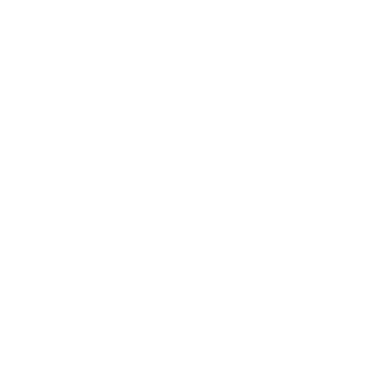

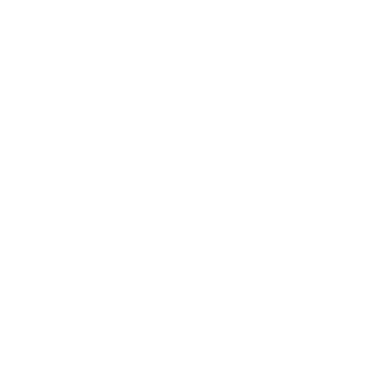

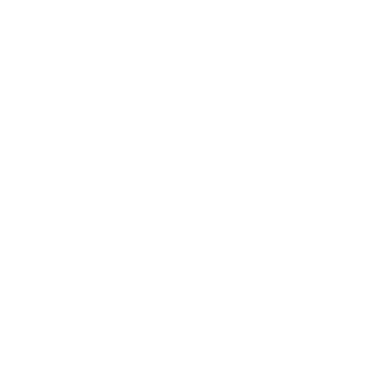

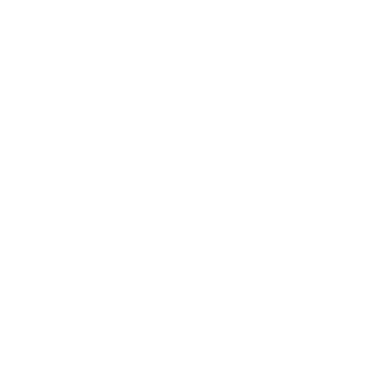

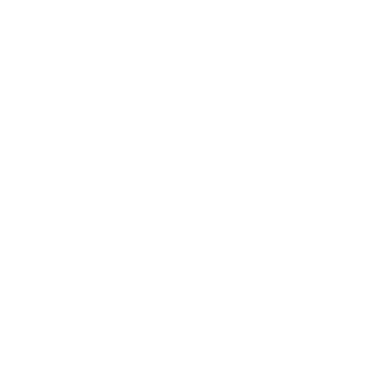

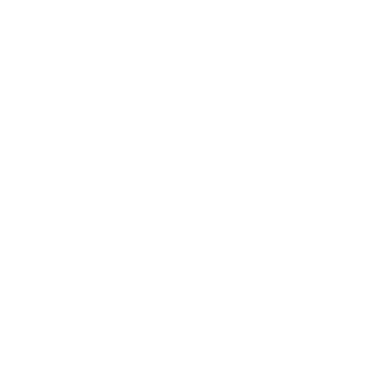

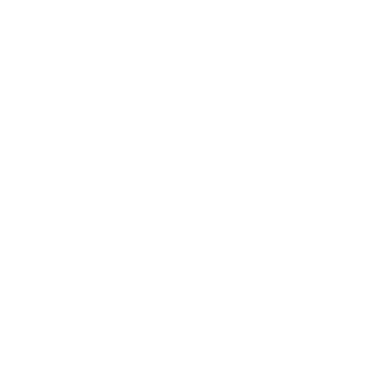

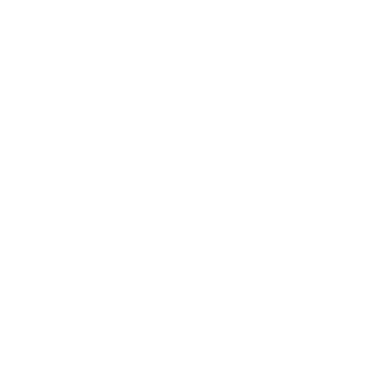

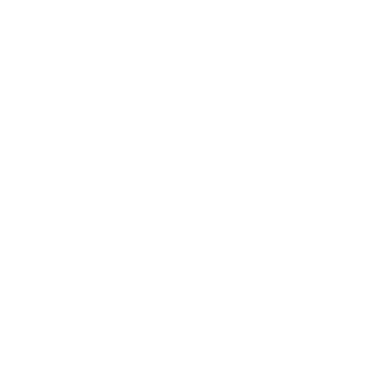

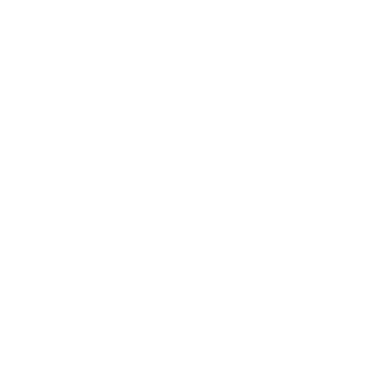

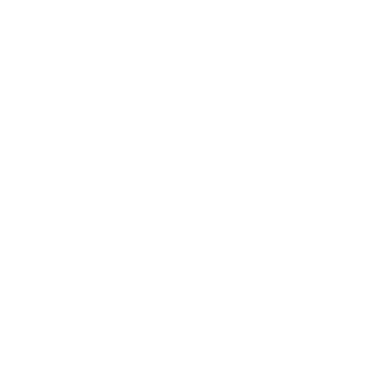

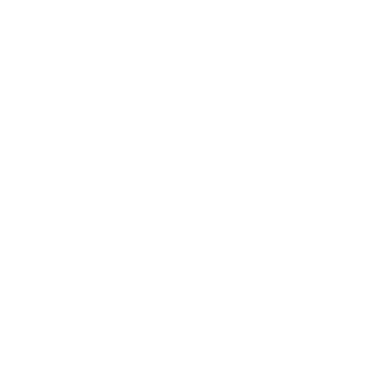

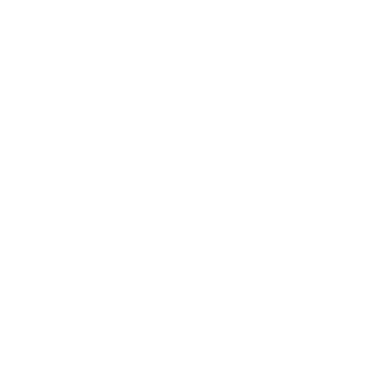

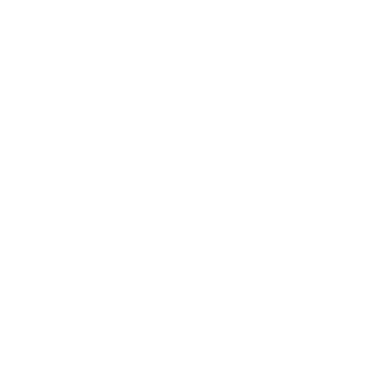

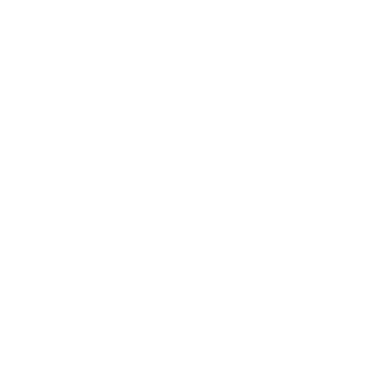

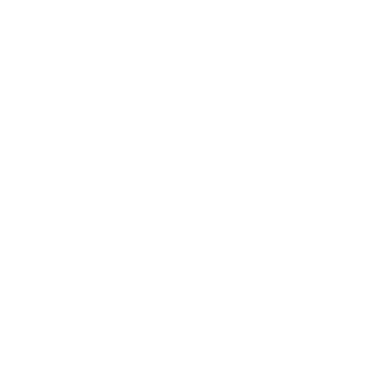

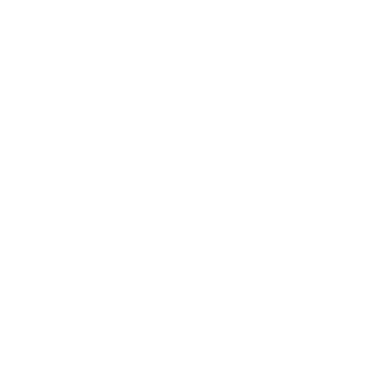

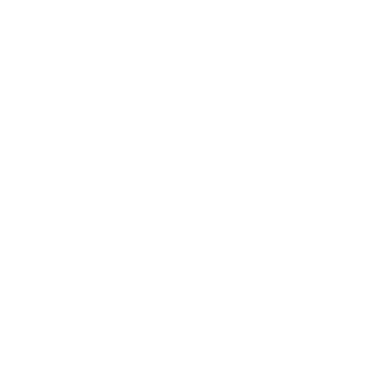

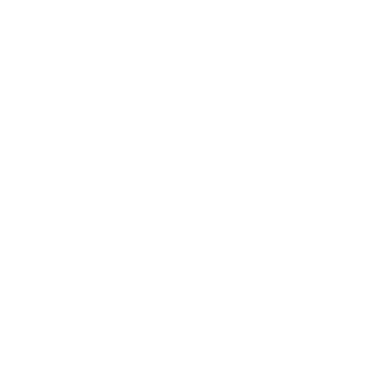

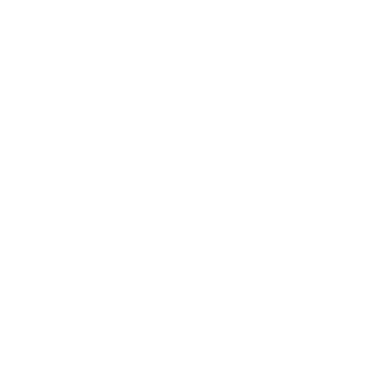

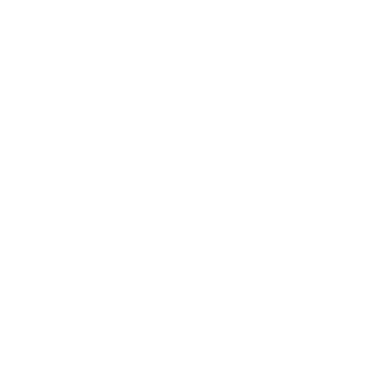

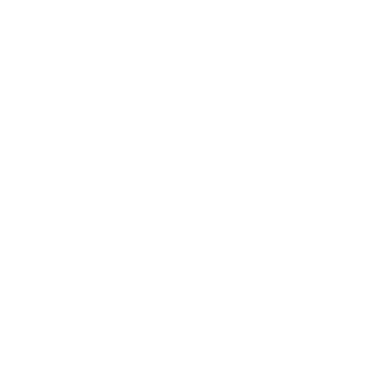

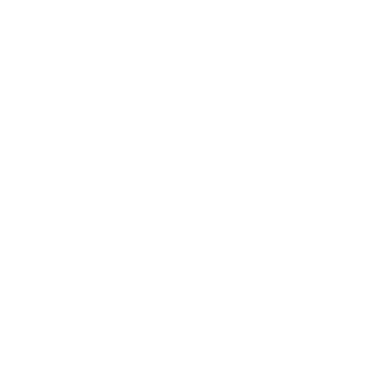

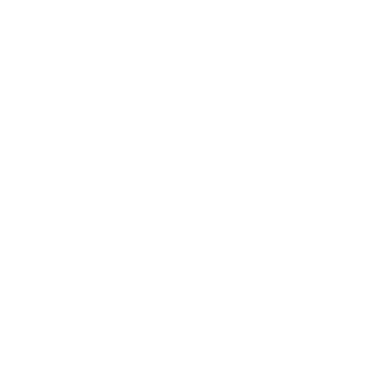

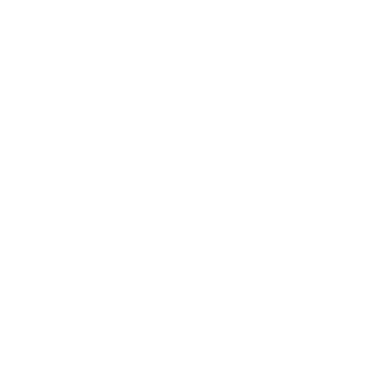

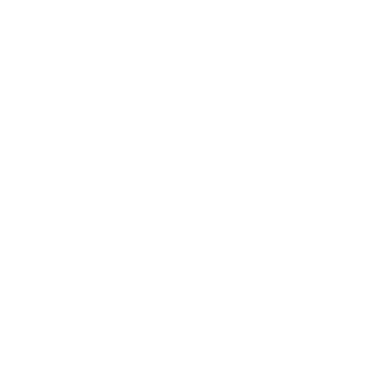

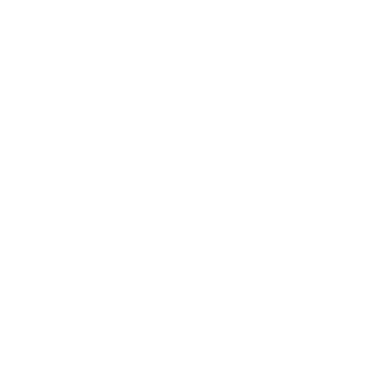

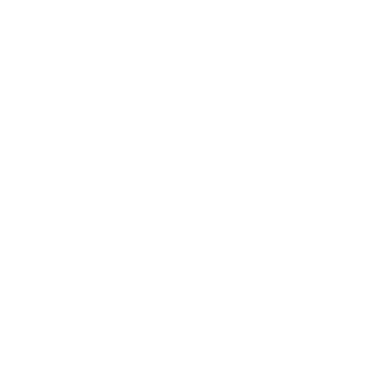

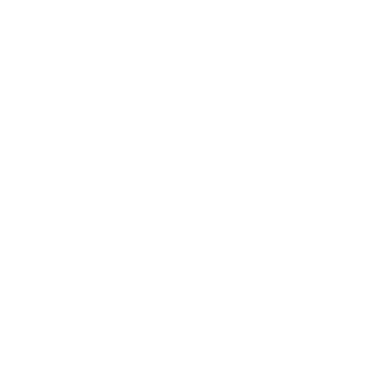

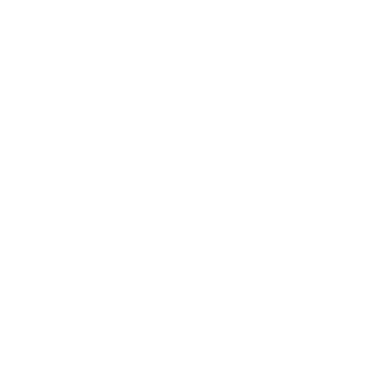

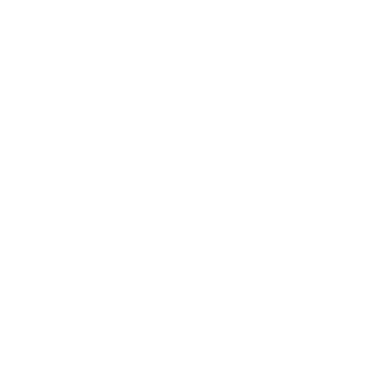

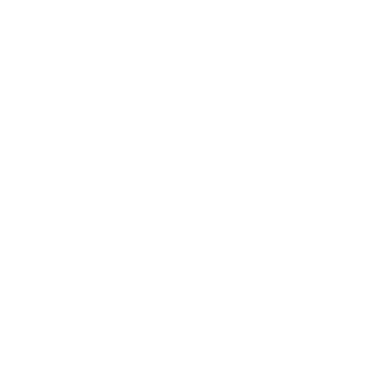

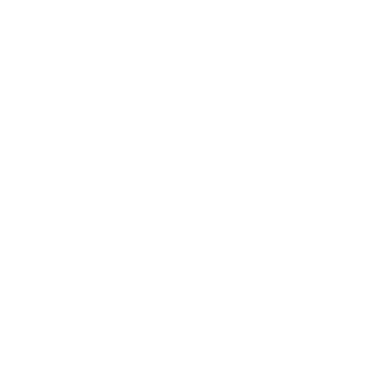

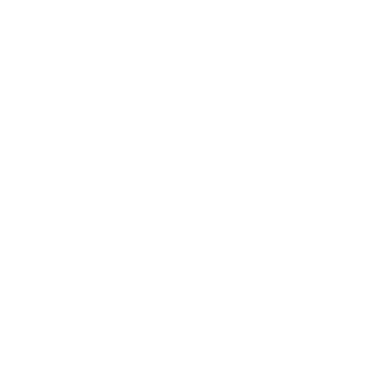

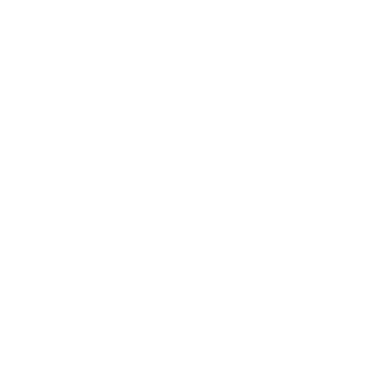

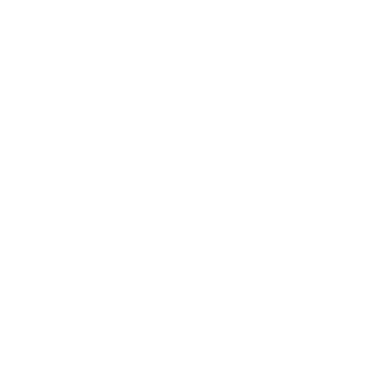

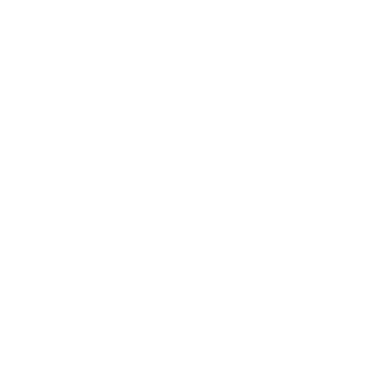

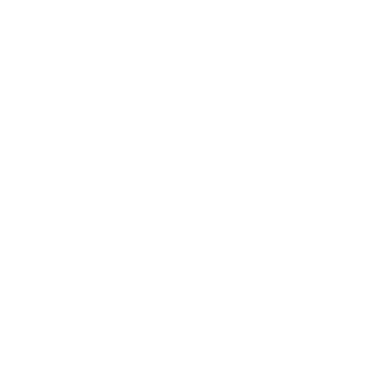

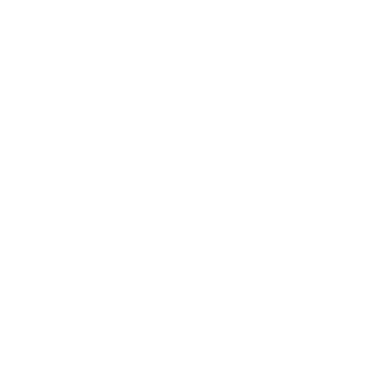

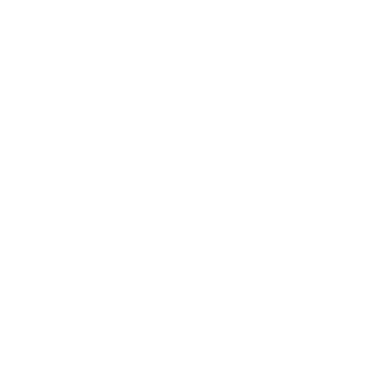

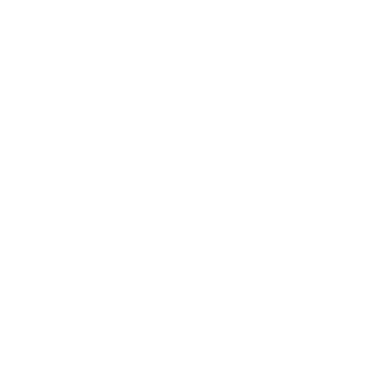

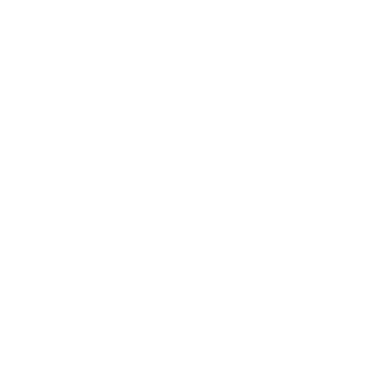

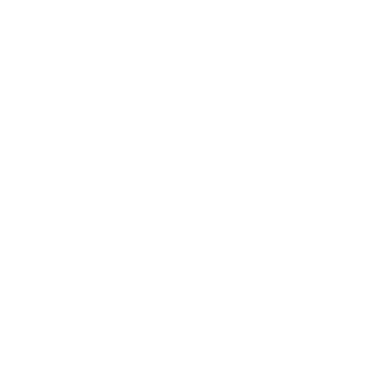

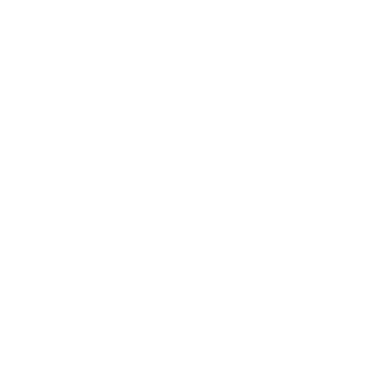

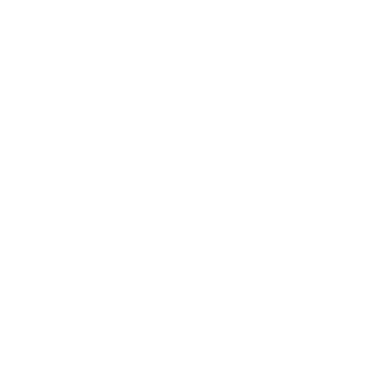

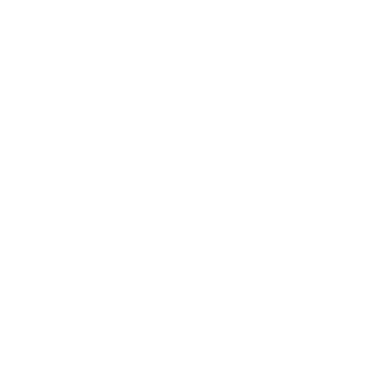

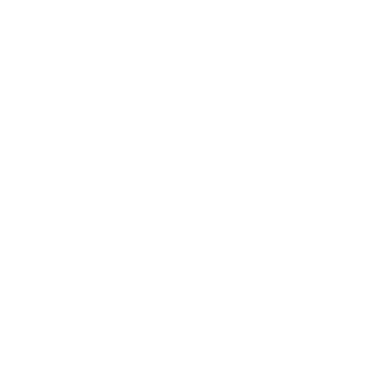

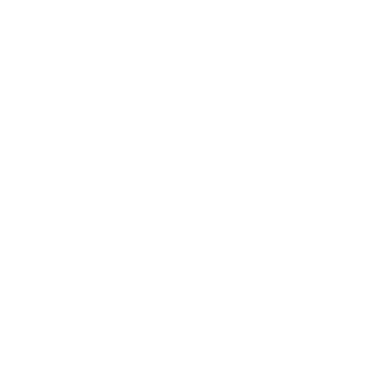

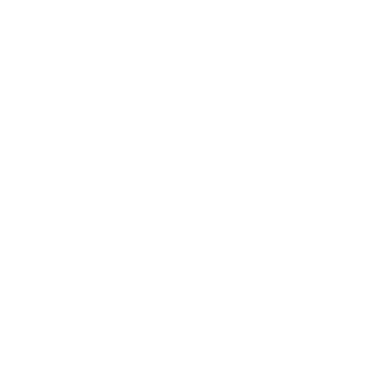

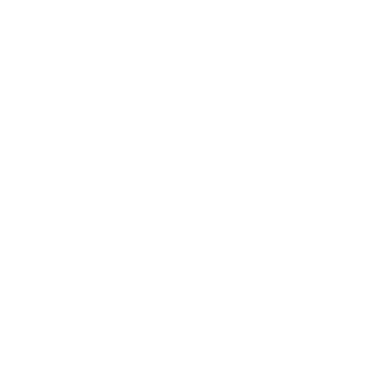

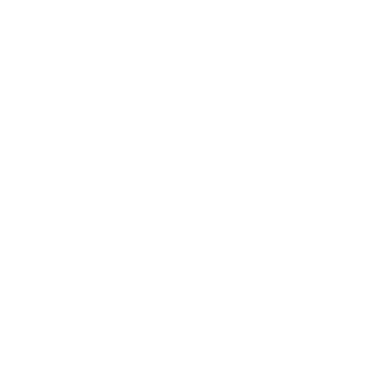

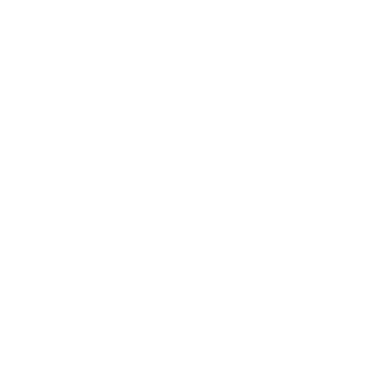

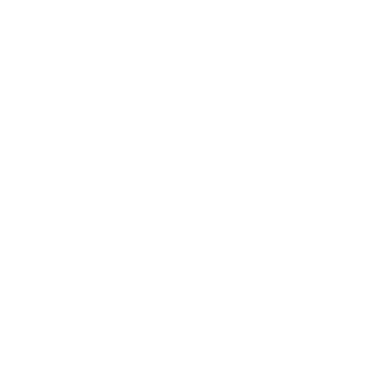

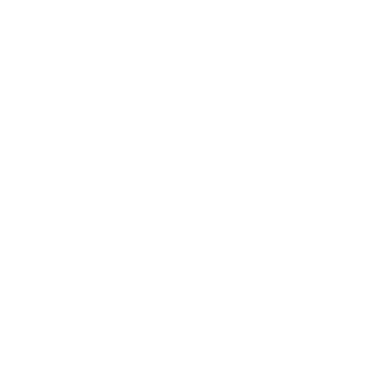

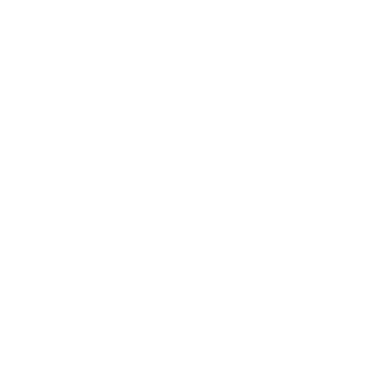

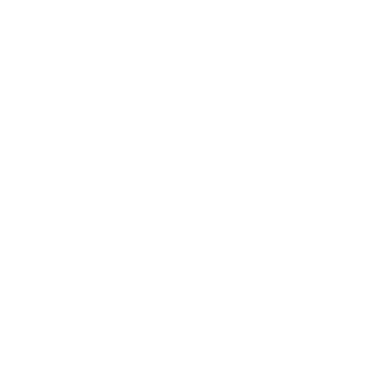

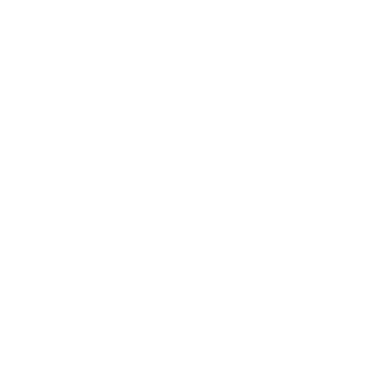

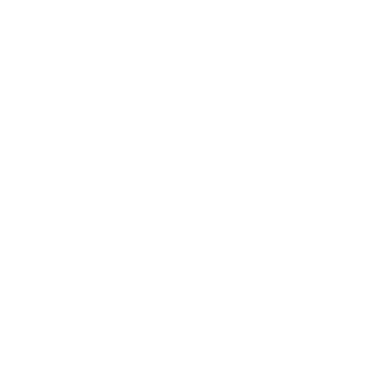

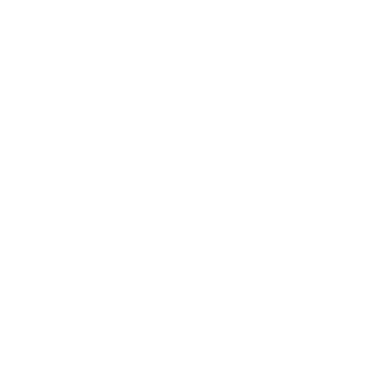

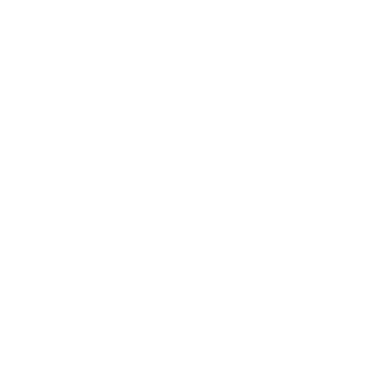

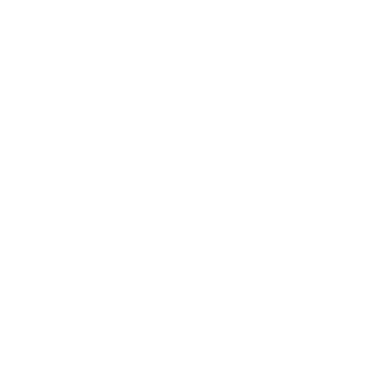

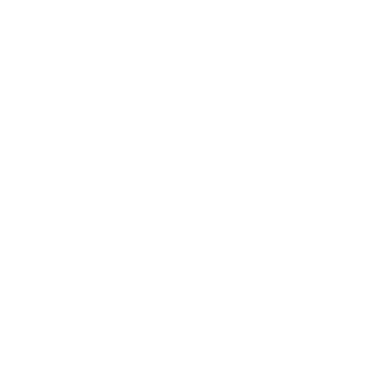

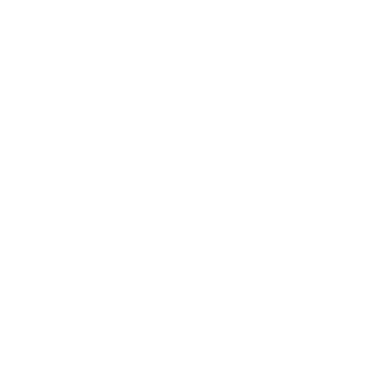

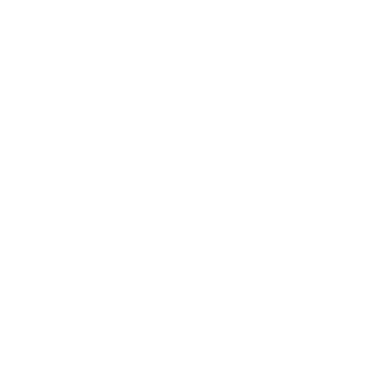

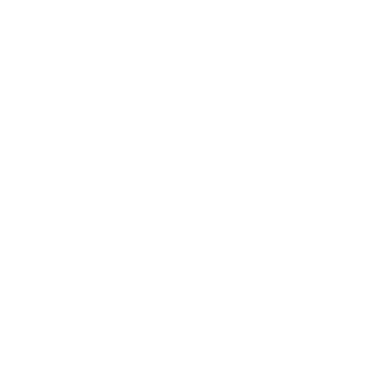

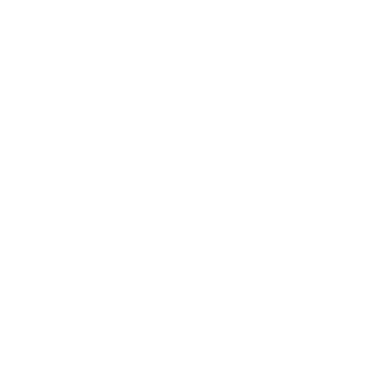

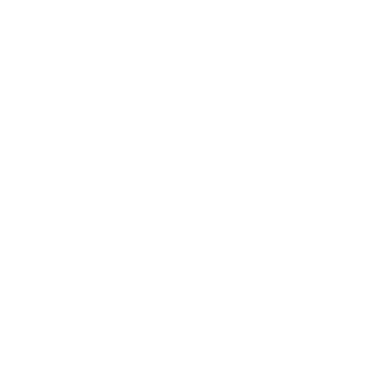

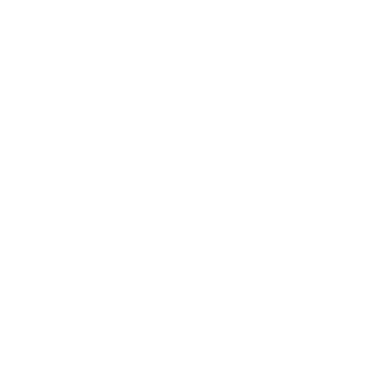

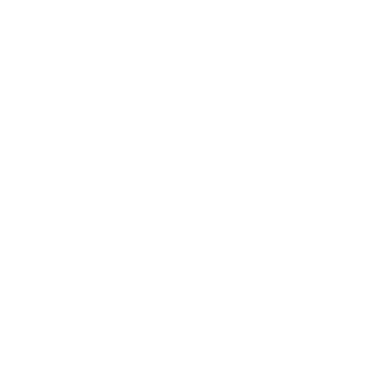

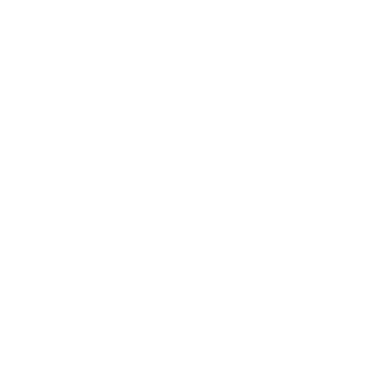

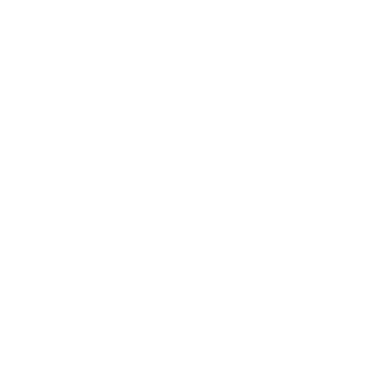

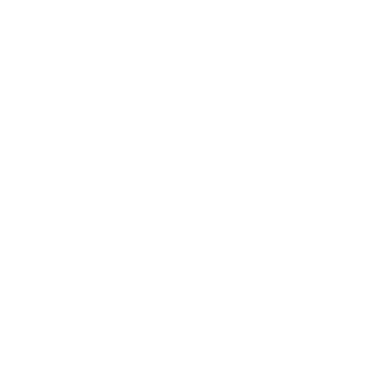

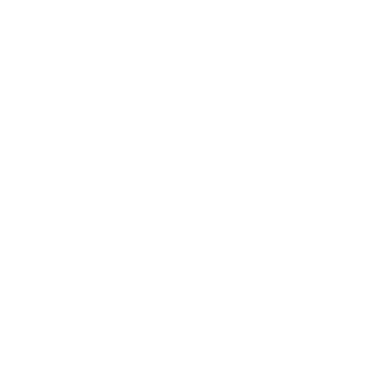

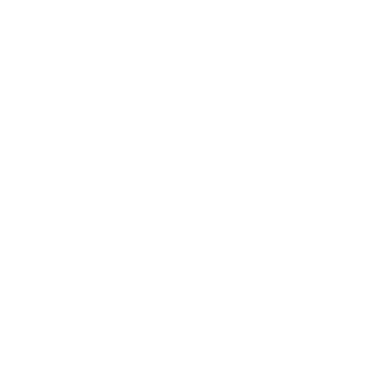

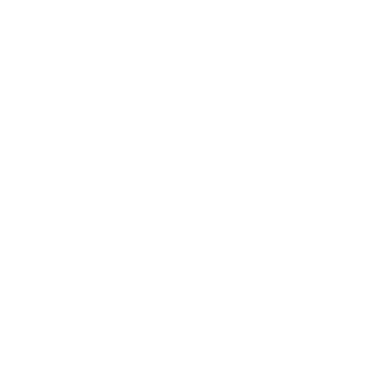

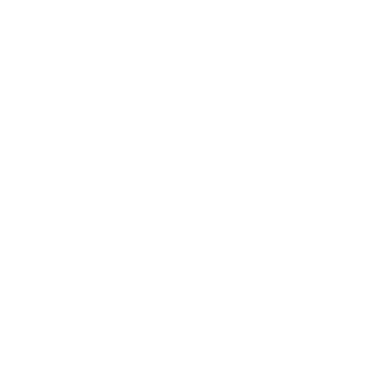

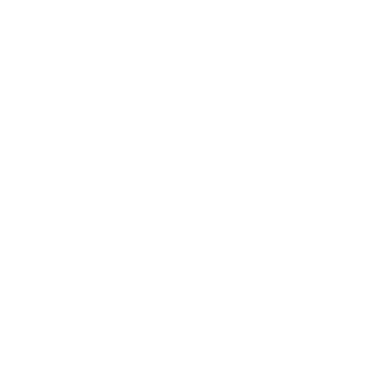

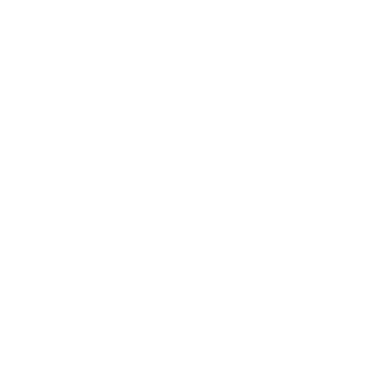

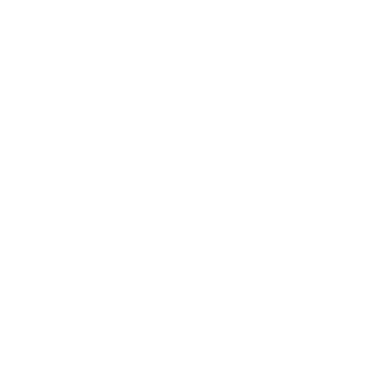

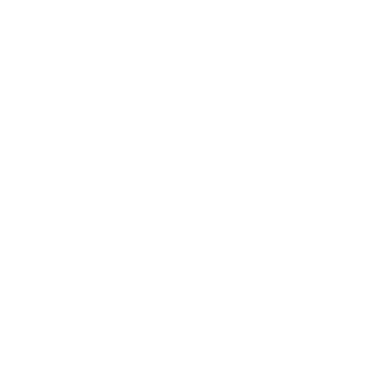

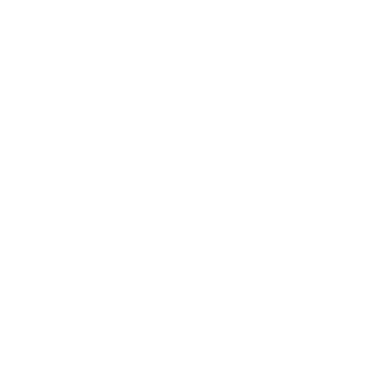

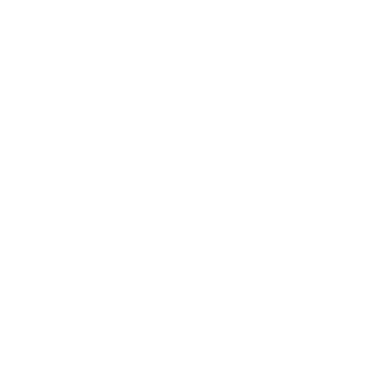

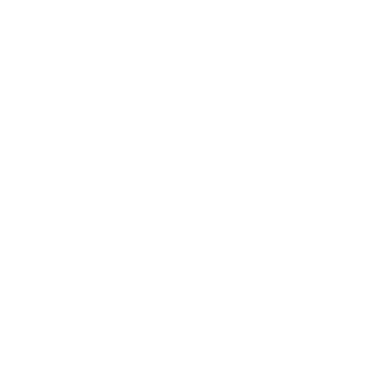

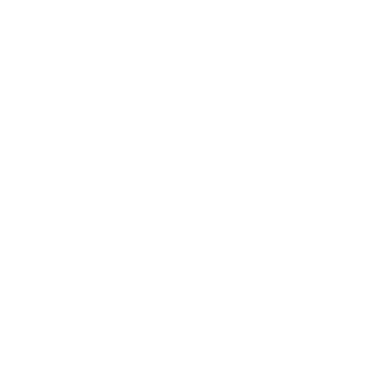

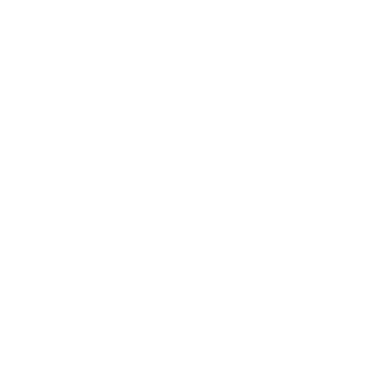

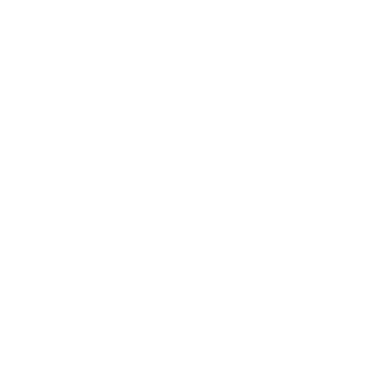

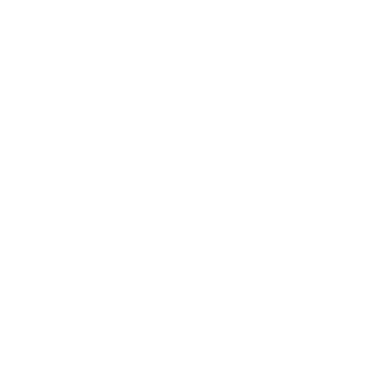

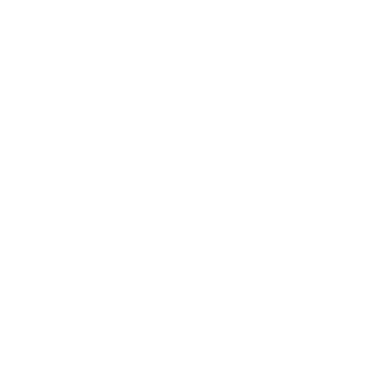

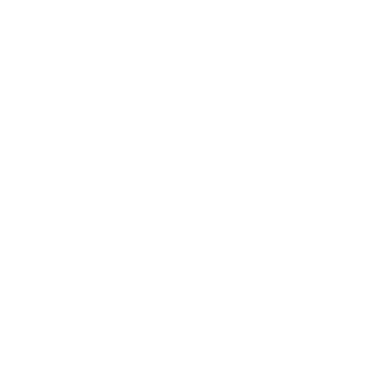

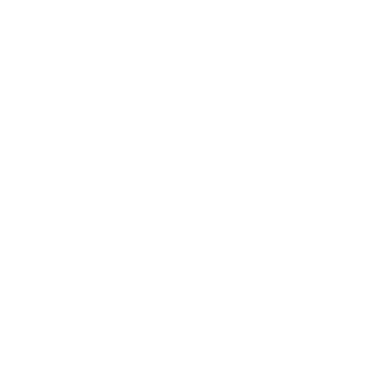

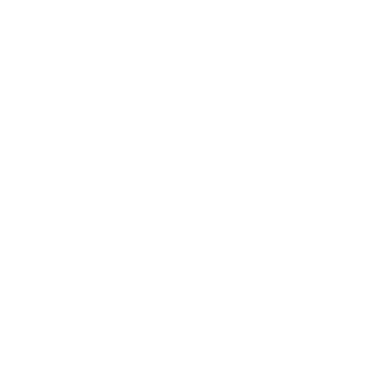

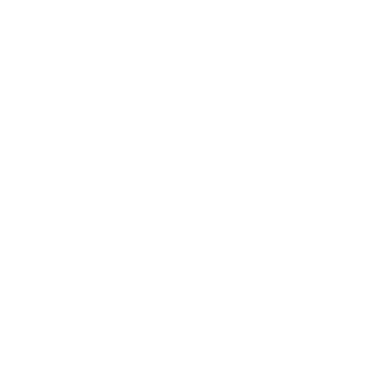

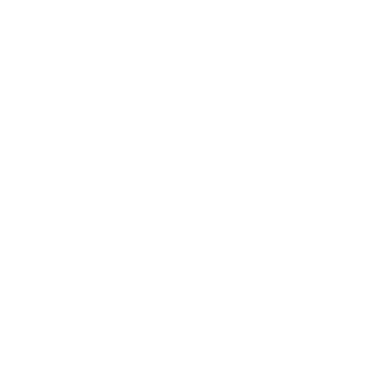

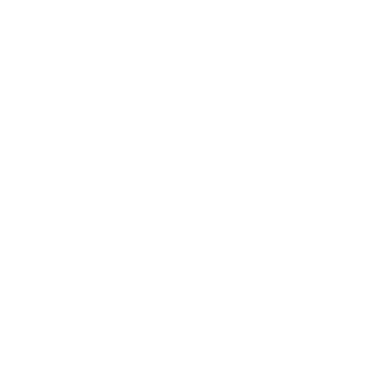

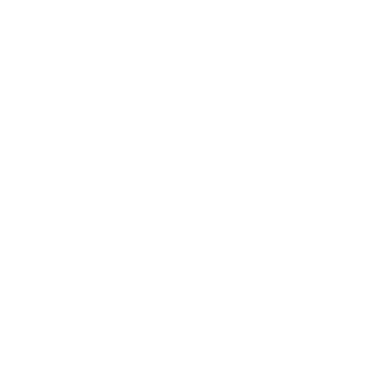

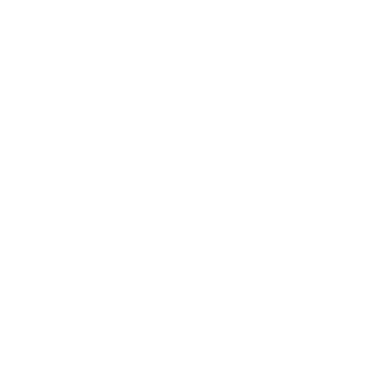

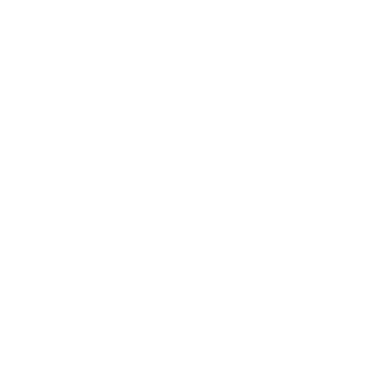

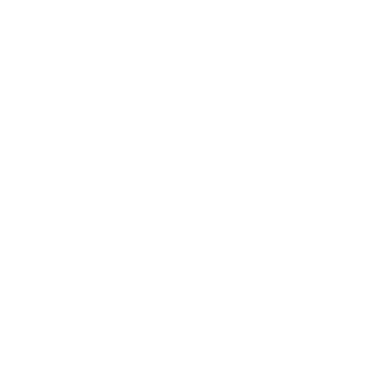

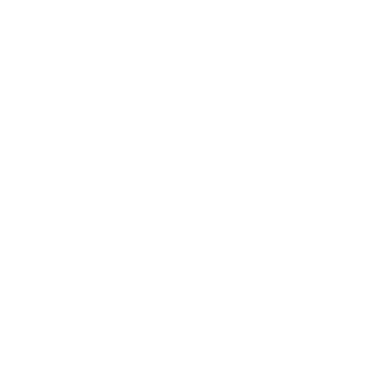

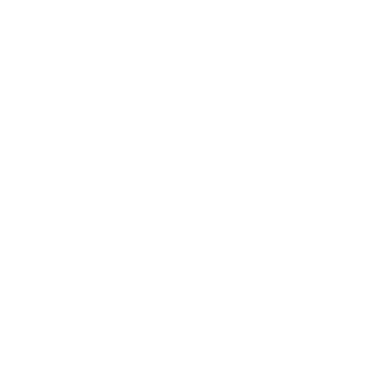

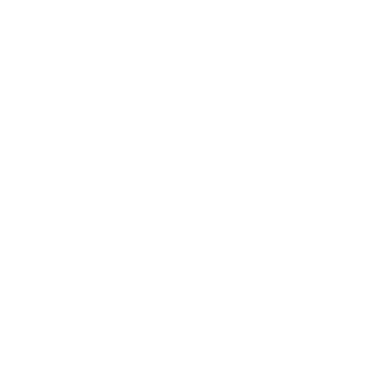

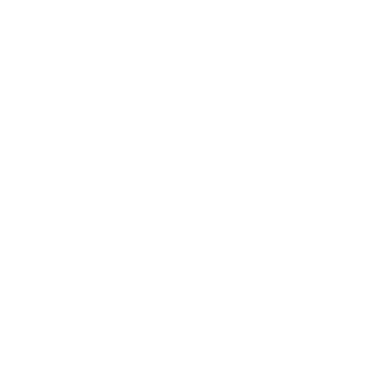

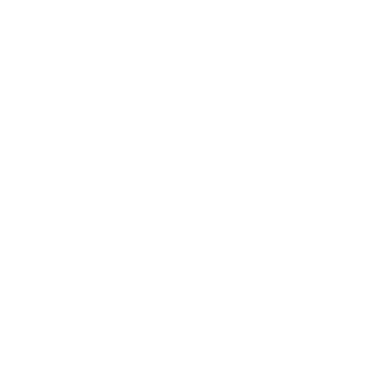

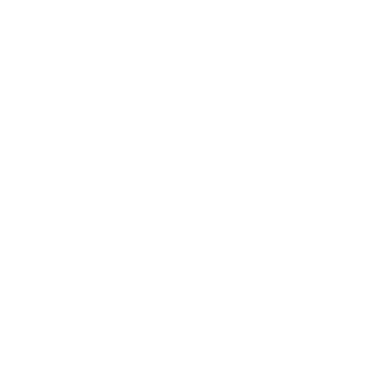

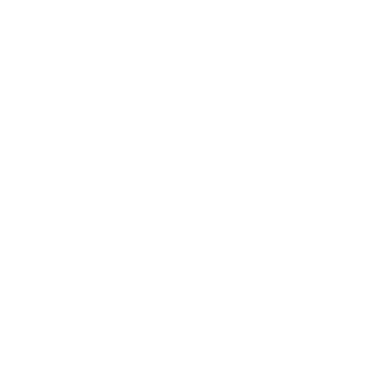

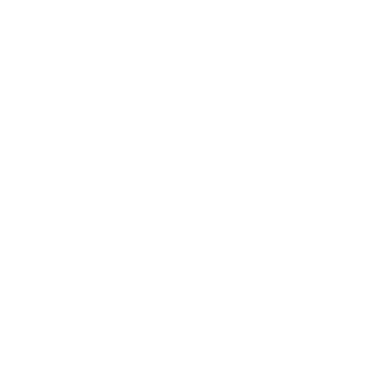

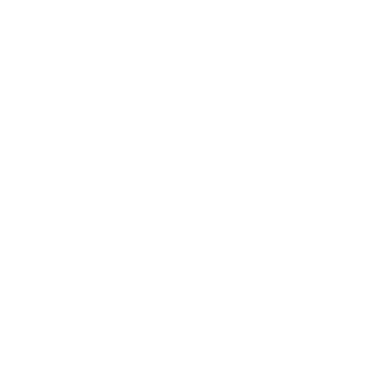

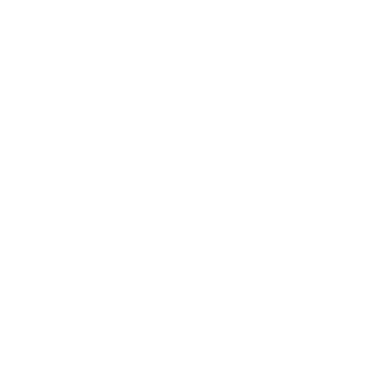

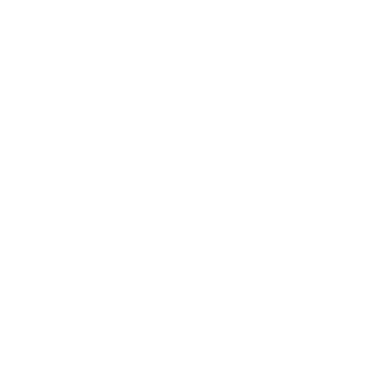

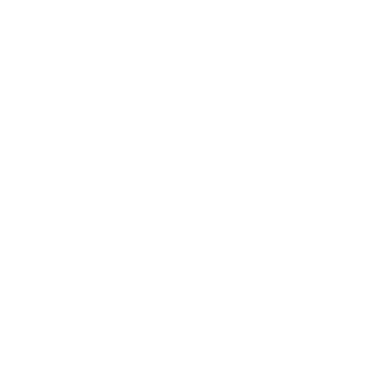

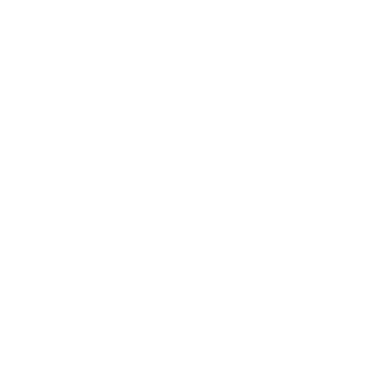

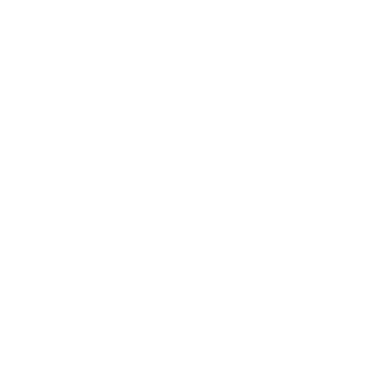

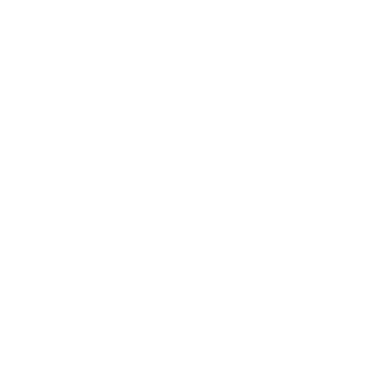

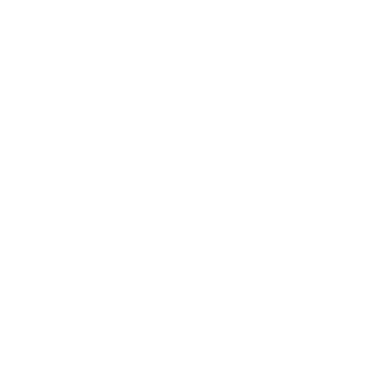

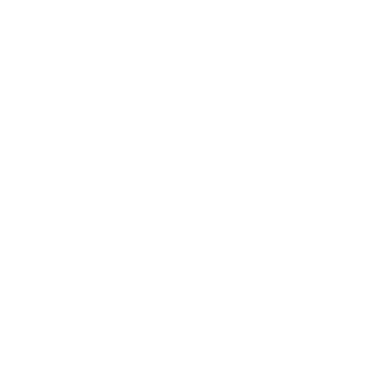

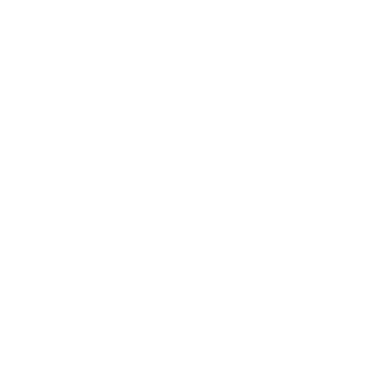

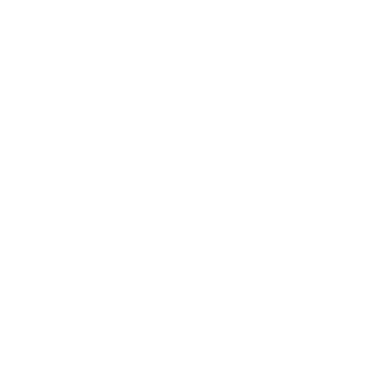

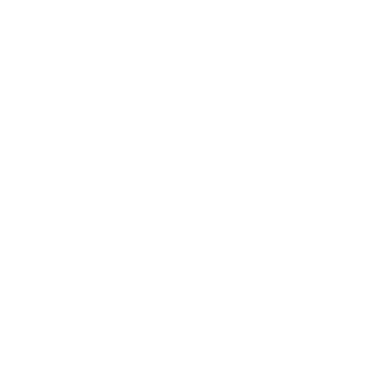

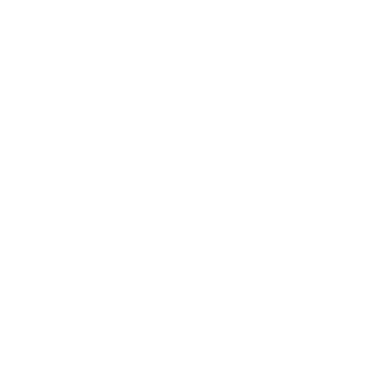

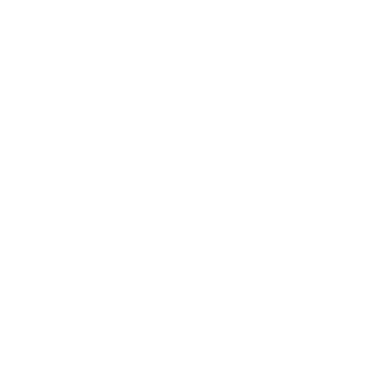

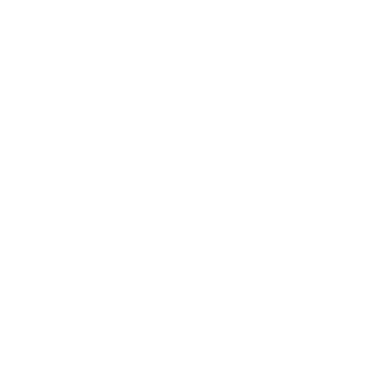

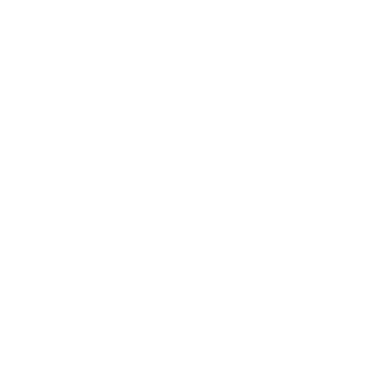

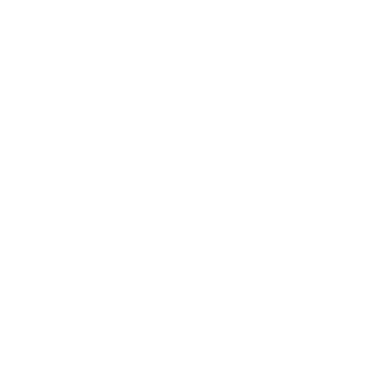

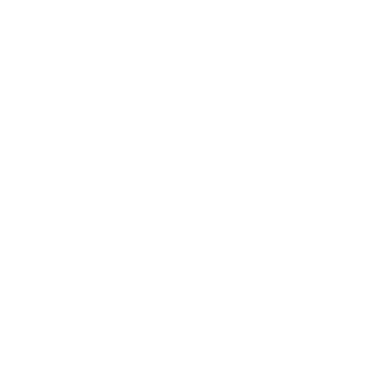

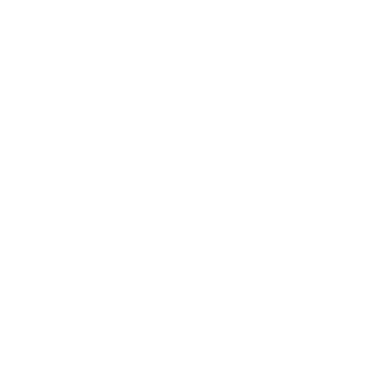

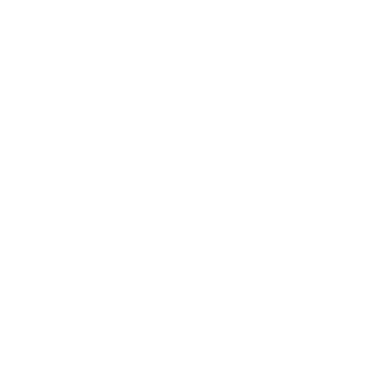

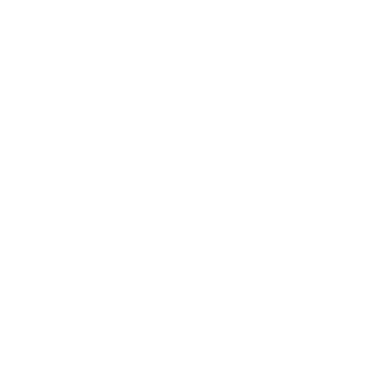

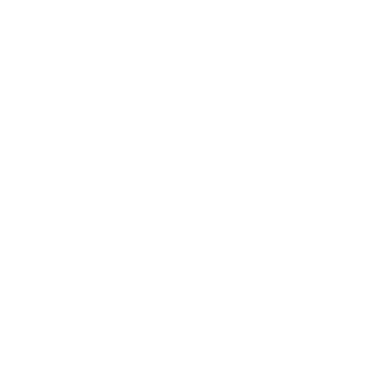

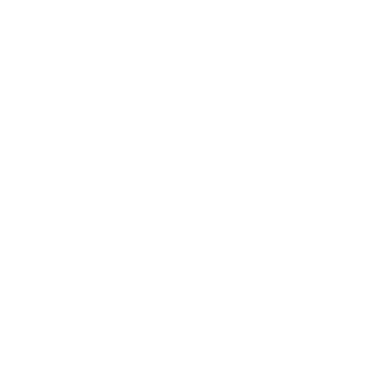

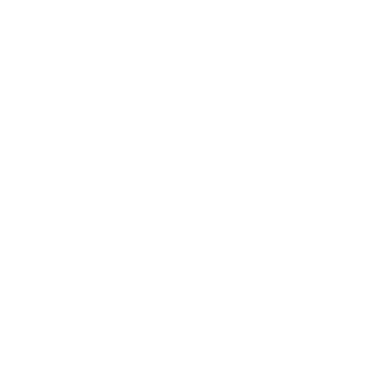

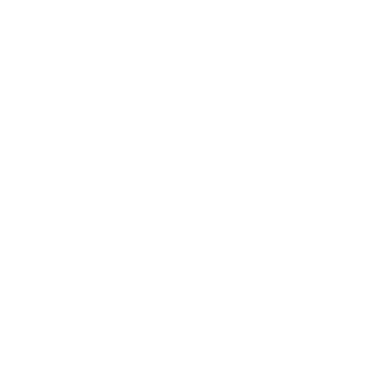

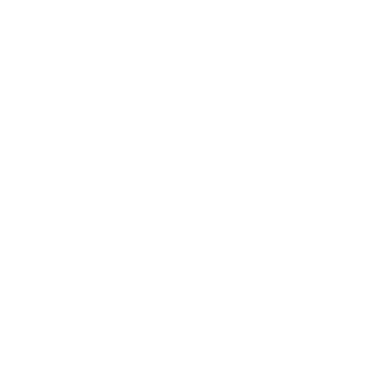

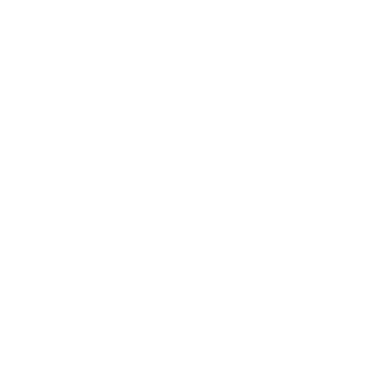

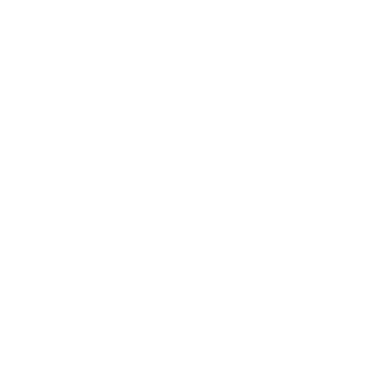

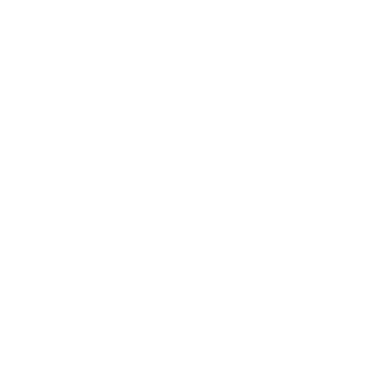

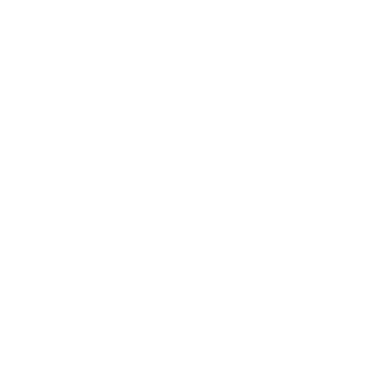

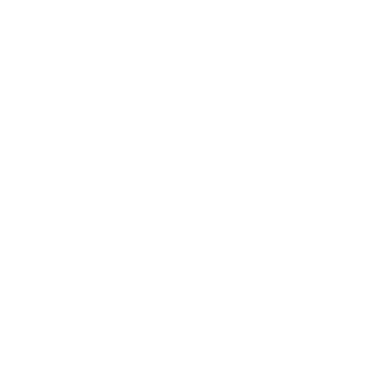

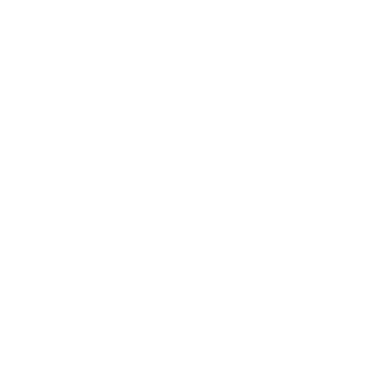

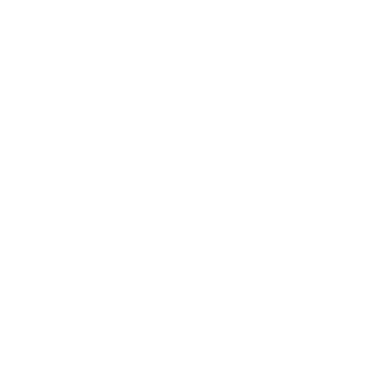

In [17]:
#Animación

#Damos el entorno donde animaremos
fig, ax = plt.subplots()


def animate(i):
    ax.clear() #Limpiamos la gráfica pasada    
    
    #Dibujamos los cuadrados
    square1_corners = np.array([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]])
    square2_corners = np.array([[2, 0], [2, 1], [3, 1], [3, 0], [2, 0]])
    ax.plot(square1_corners[:, 0], square1_corners[:, 1], 'b-')
    ax.plot(square2_corners[:, 0], square2_corners[:, 1], 'r-')
    
    

    #Consideramos el ńumero de puntos en cada caja
    num_points_square1 = ruta[i]
    num_points_square2 = s-ruta[i]

    #Ponemos los puntos de la caja 1 en posiciones indistintas
    for _ in range(num_points_square1):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        ax.plot(x, y, 'bo')

    #Ponemos los puntos de la caja 2 en posiciones indistintas
    for _ in range(num_points_square2):
        x = random.uniform(2, 3)
        y = random.uniform(0, 1)
        ax.plot(x, y, 'ro')

    # Configuramos el tamaño de las cajas
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 2)


    # Mostramos
    plt.grid(False)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    
anim = FuncAnimation(fig, animate, frames=len(ruta), repeat=False)
anim.save('ehren.mp4', writer='ffmpeg')  # Save as an mp4 video
from IPython.display import HTML
HTML(anim.to_jshtml())